<h1 style="text-align:center;">👽👽👽👽 UFO PREDICTION 👽👽👽👽</h1>

<img src="ufo.jpg">

<h1 style="text-align:center;">👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽</h1>

In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

### Let's read the data 🕵🏻‍♂️

In [2]:
ufo_df = pd.read_csv('./data/scrubbed.csv', error_bad_lines=False, low_memory=False)

In [3]:
%store ufo_df
ufo_df.info()

Stored 'ufo_df' (DataFrame)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


### Let's change some column names for easy access 👌

In [4]:
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [5]:
ufo_df = ufo_df.rename(columns={'duration (seconds)': 'duration_seconds', 'duration (hours/min)': 'duration_hours', 'date posted': 'date_posted', 'longitude ': 'longitude'})
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration_hours', 'comments', 'date_posted', 'latitude', 'longitude'],
      dtype='object')

### Let's convert columns to correct types 

In [6]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime            80332 non-null object
city                80332 non-null object
state               74535 non-null object
country             70662 non-null object
shape               78400 non-null object
duration_seconds    80332 non-null object
duration_hours      80332 non-null object
comments            80317 non-null object
date_posted         80332 non-null object
latitude            80332 non-null object
longitude           80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [7]:
def convert_int_from_string(string):
    string = re.sub("[^0-9]", "", string)
    return int(string)

def convert_float_from_string(string):
    string = re.sub(r"[a-zA-Z]", "", string)
    string = re.sub(r"\s+", "", string)
    if len(string) == 0:
        return 0.1
    print(string)
    return float(string)

In [8]:
import re
# run one time only
ufo_df['duration_seconds'] = ufo_df['duration_seconds'].apply(convert_int_from_string)
ufo_df['latitude'] = ufo_df['latitude'].apply(convert_float_from_string)
ufo_df['longtitude'] = ufo_df['longtitude'].apply(convert_float_from_string)

29.8830556
29.38421
53.2
28.9783333
21.4180556
36.5950000
51.434722
41.1175000
33.5861111
30.2947222
33.9163889
35.2333333
40.6686111
37.1536111
35.8238889
36.8430556
42.5377778
41.3252778
32.364167
42.3916667
51.5
38.1055556
32.8544444
45.5827778
51.783333
29.4238889
38.2541667
40.7008333
41.7002778
53.970571
32.7152778
38.7583333
29.7630556
32.7833333
42.9955556
-38.662334
29.7630556
44.7630556
41.0338889
53.8
41.523427
43.0388889
43.9627778
40.0150000
47.6063889
34.1577778
46.7163889
36.722263
31.7058333
35.2350000
40.2736111
30.1586111
29.6158333
35.8905556
32.7591667
55.183333
40.6936111
36.2522222
26.149798
42.9097222
34.1027778
43.666667
43.0388889
37.8044444
39.0725000
-33.093373
32.7763889
39.4402778
39.6411111
33.4222222
32.5436111
43.6666667
34.0983333
33.4483333
42.0372222
36.1750000
36.1750000
40.935998
47.6588889
35.5847222
47.55
35.2650000
38.0194444
39.1141667
32.7833333
32.7152778
46.2113889
37.6688889
37.6447222
41.6916667
27.150053
45.5650000
44.8838889
37.7241667
26

33.5805556
30.6325000
37.3394444
46.24
41.8083333
28.6608333
46.216667
42.6388889
40.0150000
41.2230556
38.7044444
40.7141667
27.2155556
40.1416667
34.0522222
37.060704
44.2619444
33.6694444
33.6694444
39.9625000
36.3319444
41.2200000
40.7297222
40.6113889
40.3355556
35.2333333
41.2450000
37.8805556
47.2530556
33.1975000
35.4816667
52.833333
38.7955556
36.1750000
42.2813889
43.1977778
33.4472222
46.6022222
26.1888889
30.099121
48.539371
31.0747222
30.0969444
43.5500000
37.4283333
37.4283333
31.5491667
41.9200000
38.8902778
32.7833333
30.6033333
38.7669444
42.3583333
31.3380556
27.8425000
35.022485
42.4927778
35.9605556
31.5491667
36.2716667
33.8941667
37.1041667
32.7763889
29.4238889
47.9177778
28.6119444
41.8500000
40.4405556
40.9747222
36.5805556
36.5297222
42.1947222
39.8963889
44.9430556
33.4483333
33.3702778
33.5386111
26.6155556
26.6155556
43.5405556
41.4202778
32.2216667
39.6527778
39.819722
43.0116667
39.1063889
35.4675000
26.6583333
44.6613889
61.2180556
43.9
38.1958333
39.891

26.7052778
26.8794444
43.2805556
36.1350000
40.1213889
33.7455556
33.4483333
40.7402778
41.2586111
41.7758333
28.3197222
47.4811111
30.3319444
37.0058333
38.4405556
44.0522222
38.6858333
41.5119444
35.2350000
34.2561111
37.996388
28.5380556
42.7244444
40.8002778
31.0980556
39.7558333
35.8533333
43.1391667
40.1744444
43.2122222
42.235641
43.1466667
33.5205556
30.4013889
39.177404
39.6416667
40.7000000
37.972571
44.7150000
35.2225000
37.9736111
37.5958333
33.8600000
35.3805556
40.6083333
35.0536111
52.906367
39.6005556
46.24
32.8572222
37.3394444
28.0777778
52.566667
36.6222222
48.5466667
26.0625000
39.5400000
43.6136111
47.6447222
34.0350000
27.2436111
38.0291667
33.2000000
49.166667
35.2269444
36.8655556
33.5205556
44.763452
40.0150000
42.9722222
41.4569444
35.3338889
40.6805556
35.3338889
38.0672222
42.2508333
35.1494444
37.9747222
45.5947222
41.5244444
39.7338889
35.0866667
45.5236111
34.0522222
40.3211111
34.2783333
47.6105556
36.9086111
33.7488889
26.5250000
26.7080556
47.6063889
4

43.544596
44.0522222
39.9522222
32.7355556
39.7391667
42.6386111
42.3211111
36.6002778
46.216667
50.4
42.0341667
43.9627778
43.9627778
47.6063889
38.5450000
38.5450000
23.063656
41.6027778
37.2152778
38.5472222
21.451331
41.5875000
39.7683333
30.4055556
40.5886111
42.0083333
41.5733333
41.42265
33.3527778
34.155373
43.666667
42.3369444
32.7947222
38.9413889
38.3227778
44.8341667
30.1577778
33.7475000
33.7475000
54.116667
39.1405556
44.0475000
41.6269444
40.7141667
37.5850000
48.4213889
51.505833
40.8041667
40.7186111
38.6675000
35.3583333
35.3583333
46.2113889
35.0844444
45.6388889
41.1844444
40.9866667
34.1169444
35.6869444
41.5038889
41.5038889
46.6022222
38.7522222
43.7022222
44.033333
38.3566667
42.080698
38.3566667
37.2608333
47.6063889
34.2072222
33.9533333
38.6272222
29.663547
33.5016667
40.8861111
46.6022222
43.666667
64.7511111
38.5816667
40.8611111
34.0736111
40.7608333
40.7038889
39.6066667
19.432608
25.187459
43.0388889
43.0630556
-0.95
39.2902778
41.6005556
41.3572222
29.7

39.7683333
38.083403
40.177431
36.0652778
33.6000000
38.2919444
38.9780556
36.0652778
37.6447222
41.7472222
38.9905556
41.7472222
37.2683333
37.6016667
41.673372
-23.933333
-23.9475
38.9011111
41.3158333
42.3266667
41.6555556
28.5380556
38.6411111
39.5297222
44.0805556
43.5363889
34.8833333
35.050674
34.8833333
40.0016667
40.7141667
33.6694444
36.1750000
40.335648
30.6694444
35.0802778
33.6638889
39.728494
33.9513889
38.965359
37.1236111
34.1394444
32.3666667
35.730631
40.2961111
40.7875000
40.9488889
40.0444444
33.4222222
38.6858333
35.7788889
40.822072
33.6188889
57.166667
33.744461
42.7652778
32.3880556
34.8088889
27.2541667
37.1236111
32.4486111
40.8963889
53.316667
30.0463889
33.8352778
33.9533333
42.5277778
33.664876
32.5230556
42.1705556
37.7477778
39.0516667
35.3394444
27.9472222
40.7744444
35.2908333
35.2908333
39.6291667
36.0525000
38.953617
41.3661111
39.7683333
34.7694444
49.9935
46.2397222
39.7391667
39.0991667
40.8858333
40.7402778
-33.861481
51.514125
36.6913889
37.74166

47.6588889
40.9252778
27.4986111
33.2775000
36.2941667
35.5069444
33.4330556
33.6888889
33.9730556
32.9477778
33.6888889
34.0625000
41.7108333
61.2180556
28.9002778
43.4194444
39.7391667
41.5386111
42.8741667
42.2875000
33.0461111
40.9488889
36.1750000
35.4833333
33.5805556
35.9127778
39.1652778
41.5200000
41.1888889
26.3180556
45.523452
41.2586111
47.9447222
38.6272222
35.9605556
32.7938889
46.2113889
46.2113889
46.2113889
42.0986111
42.0986111
40.3691667
45.3575000
39.7683333
39.1433333
44.333333
40.165393
45.5236111
40.7722222
40.6936111
40.0333333
35.0886111
39.2130556
38.7133333
38.7133333
43.6275000
42.3905556
40.1983333
33.8491667
40.1672222
40.4163889
41.5580556
49.366667
37.2152778
31.1169444
41.3683333
36.9613889
34.4208333
44.3105556
52.916667
33.7669444
30.4866667
40.0150000
44.4758333
33.967338
31.5602778
40.2150000
33.8491667
33.3583333
49.033333
39.7136111
40.7608333
30.6941667
26.6402778
34.2072222
39.7683333
41.7305556
40.7844444
38.3963889
45.0105556
45.5608333
46.216

43.8522222
43.8522222
42.4775000
38.7244444
-14.599413
31.3363889
41.1505556
-34.816667
35.6225000
35.6225000
40.416598
42.5430556
41.2375000
40.3100000
41.123876
33.8883333
41.3322222
39.6005556
42.2625000
40.2472222
40.3858333
53.610421
43.1775000
41.3197222
40.7936111
46.1336111
38.8338889
35.2269444
39.6133333
34.5400000
33.7669444
33.9525000
33.4472222
-33.224584
44.9583333
33.396856
33.7797222
32.7152778
32.7152778
32.7152778
47.9791667
35.8788889
47.7558333
32.8047222
33.1433333
31.4172222
34.8697222
29.0386111
7.843899
34.0522222
40.8000000
37.2152778
42.188772
33.1030556
44.5647222
39.6538889
45.5236111
51.127876
31.2169444
37.9780556
47.2152778
40.4233333
33.3244444
34.2163889
37.2866667
27.273049
43.2311111
27.1972222
39.1619444
38.9975000
33.5441667
28.6802778
37.6236111
44.1244444
27.3361111
41.6638889
49.25
49.25
23.3441
34.0900000
39.8402778
39.8122222
40.2452778
39.7944444
39.4408333
52.466667
33.7630556
37.3394444
20.8947222
-25.274398
40.7719444
40.712784
41.0813889
5

31.8541667
41.7747222
30.2669444
48.4213889
34.2783333
33.9908333
37.6688889
42.6805556
33.9608333
34.3650000
26.6833333
34.1083333
39.9241667
43.7972222
36.7277778
44.0355556
43.9680556
36.990559
37.004245
43.6275000
37.6775000
37.6775000
35.2225000
36.9613889
42.2966667
30.5066667
33.4936111
25.7738889
38.5816667
44.2911111
32.5325000
41.3572222
38.0280556
36.6691667
38.1777778
45.0563889
41.1838889
41.2586111
38.9605556
39.6294444
35.6697222
43.1116667
42.1033333
44.7894444
41.0533333
41.4044444
40.5433333
40.5433333
36.1750000
34.2783333
43.7358333
33.7669444
33.7669444
40.7205556
40.4405556
47.5288889
46.823102
12.879721
43.2983333
42.9005556
42.8566667
39.4561111
34.0522222
33.1858333
39.1405556
42.0347222
40.7402778
42.5583333
40.057838
41.5380556
30.093395
41.4969444
41.0813889
38.1505556
-31.95224
38.4405556
42.9311111
33.2002778
34.4838889
41.6005556
33.6408333
41.6005556
44.0463889
40.3222222
37.6438889
34.0858333
35.9525000
34.1650000
37.5455556
30.2383333
41.9000000
26.062

28.9002778
39.8208333
37.6819444
37.6391667
38.3855556
34.2255556
40.6563889
37.4716667
43.6136111
34.1808333
33.8752778
39.7850000
26.1719444
44.9430556
40.1150000
28.2394444
38.7744444
33.9980556
37.2708333
37.3541667
33.4352778
28.5555556
27.4986111
38.8461111
29.1869444
34.0519444
33.963056
32.7252778
36.7341667
34.2011111
35.0844444
40.3769444
26.3583333
33.3061111
40.6408333
26.6250000
32.7938889
45.666667
32.2216667
40.433284
33.6680556
27.4986111
32.7677778
33.8722222
43.6794444
34.0700000
37.0058333
39.9522222
41.7469444
32.7152778
33.6797222
40.4405556
42.3583333
38.2541667
40.4405556
35.7330556
47.5002778
47.6588889
39.8783333
39.1619444
39.403986
33.8158333
32.2216667
43.1280556
47.3811111
36.2080556
25.7738889
42.2527778
40.9311111
39.7294444
42.3313889
45.3566667
36.0525000
25.8780556
41.395049
43.5697222
30.8202778
42.9105556
29.2094444
37.2708333
27
40.8897222
27.7000000
36.5041667
22.572646
39.6066667
46.916667
37.6938889
30.6277778
44.6713889
36.7416667
33.9202778
47.

38.7216667
40.3911111
33.7513889
25.8897222
42.8027778
43.15
36.180267
39.3372222
40.4405556
43.2508333
29.4238889
34.772013
41.121012
44.0522222
43.433333
25.9327778
40.6936111
33.4483333
46.2113889
44.8897222
38.7297222
40.411367
45.4463889
52.92253
33.8816667
33.886214
51.189722
32.7833333
37.4852778
33.8352778
27.3361111
33.8536111
42.0450000
42.1166667
45.1200000
41.9666667
48.7597222
47.2044444
47.6741667
47.4830556
45.6388889
47.5730556
48.775877
44.9111111
-31.95224
45.5608333
38.8338889
41.1400000
36.9741667
39.7294444
42.9386111
38.3641667
42.4602778
40.8000000
35.2922222
51.666667
37.6688889
36.3019444
37.9063889
37.4419444
35.7441667
32.2986111
46.8083333
40.3477778
33.6888889
24.5552778
53.55
47.9663889
39.1405556
35.7325000
-9.445638
27.893965
29.7855556
44.4325
7.341063
35.9172222
41.8472222
33.3527778
40.1261111
39.1788889
39.1225000
42.6525000
33.5205556
53.268083
34.0230556
32.6208333
61.2180556
33.5205556
33.6888889
33.5205556
33.5205556
33.5205556
33.5205556
33.9944

40.7536111
35.2472222
37.9886111
47.2530556
29.7027778
40.9502778
46.5927778
53.166667
12.971599
36.8252778
36.3008333
39.8680556
31.9616667
38.7838889
49.145922
46.2830556
39.8544444
37.2752778
51.516667
51.516667
51.633333
32.9813889
53.533333
35.4305556
51.516667
29.7944444
28.5491667
34.0702778
52.416667
52.416667
38.0291667
46.6541667
45.5236111
-28.00029
41.8500000
48.416667
44.7538889
45.0052778
40.9113889
29.4658333
31.5941667
38.3452778
39.9369444
28.2394444
42.5277778
44.9430556
40.640063
35.8455556
47.1555556
35.9100000
47.5675000
42.5777778
37.9063889
33.5777778
33.5980556
33.5980556
30.4013889
33.8702778
27.4986111
37.8044444
45.6388889
32.2205556
35.2827778
40.6083333
39.1502778
39.9611111
34.4358333
34.0552778
30.3677778
28.7027778
42.7261111
32.7252778
34.5022222
46.7402778
29.4236111
37.7022222
28.6608333
34.3461111
42.1275000
32.7152778
44.0838889
33.9925000
33.1211111
51.514125
39.9536111
37.6625000
44.9430556
39.8494444
46.8675000
45.5236111
40.6422222
39.2191667
32

28.9002778
41.890833
33.729388
26.9294444
27.724722
30.3319444
35.4769444
47.1275000
44.3236111
42.2286111
41.6827778
48.0402778
40.4655556
41.0813889
42.0694444
45.5236111
40.4850000
31.3150000
33.6000000
33.9163889
43.2122222
37.9716667
39.6836111
42.1538889
37.9480556
37.9480556
33.3416667
38.0050000
45.5
39.7391667
33.9136111
31.7605556
32.2216667
32.2216667
32.2216667
33.7591667
47.833889
26.8230556
40.1786111
38.9783333
42.846108
32.2094444
32.7152778
52.350785
36.6002778
39.9322222
33.9375000
31.8455556
31.8455556
39.3508333
29.7027778
26.0108333
39.7391667
42.0147222
40.7141667
43.1547222
41.6577778
51.083333
47.2955556
33.4222222
29.7352778
32.7833333
41.4994444
40.0377778
38.9905556
41.4444444
40.5394444
40.2108333
39.6836111
29.4238889
30.6941667
36.8222222
-7.119496
31.4127778
-21.170401
36.5194444
33.6625000
28.9022222
32.5888889
36.4091667
33.4669444
33.4269444
47.8108333
41.4108333
47.5302778
40.291694
33.4269444
39.8027778
42.7358333
41.2794444
39.9008333
37.9886111
42.

39.0169444
39.0169444
41.5775000
40.5652778
33.0580556
36.8688889
36.8688889
47.6063889
33.4858333
30.3958333
41.7002778
30.7916667
40.7447222
44.35
46.521858
45.466667
39.6477778
38.2494444
40.2736111
30.1758333
38.6861111
41.4047222
34.0522222
41.9650000
45.388496
39.8855556
39.0541667
50.016667
41.6661111
33.0738889
40.5580556
39.2013889
40.7966667
36.3302778
34.1952778
39.5775000
34.9577778
37.0433333
23.838805
13.727896
41.8500000
40.6213889
42.8863889
42.3136111
47.4875000
41.8108333
30.3933333
35.0455556
39.7475000
38.5816667
41.3580556
39.0911111
42.7675000
45.0380556
47.6588889
37.2808333
39.8411111
33.8722222
33.8358333
37.7750000
37.892726
33.7669444
34.0522222
34.1511111
28.198096
25.9561111
34.0900000
53.283333
32.7252778
34.0633333
40.6955556
41.8897222
47.4475000
34.0522222
44.2911111
32.2216667
33.170278
35.1405556
22.308085
31.8911111
33.5016667
45.2630556
44.9800000
40.0580556
37.0236111
31.8466667
39.7491667
27.9472222
50.885488
40.1205556
39.9777778
38.2541667
44.17

35.1475000
37.7750000
33.4483333
40.7141667
29.2769444
30.409204
20.8947222
37.6922222
37.6922222
41.686111
34.7369444
41.4080556
-25.746111
30.4980556
27.5469444
45.7833333
44.4758333
35.348378
41.3163889
41.4569444
37.9608333
41.7694444
20.963681
59.6425000
42.7344444
42.6388889
35.3052778
37.1297222
34.1138889
25.7738889
42.2833333
41.2586111
40.1741667
30.6033333
28.5380556
35.2427778
61.2180556
37.7808333
36.9902778
33.4352778
42.7261111
-0.95
37.9577778
33.6888889
31.4713889
33.8158333
37.9747222
40.7608333
34.3541667
27.0994444
47.0344444
33.9730556
41.3197222
40.7141667
39.7588889
28.2438889
30.2669444
47.6063889
45.6388889
47.9663889
-33.861481
30.3319444
33.4222222
39.019184
9.916667
49.25
33.5538889
46.2113889
39.5138889
34.1486111
33.8444444
34.0555556
33.4936111
34.132247
34.2438889
33.6633333
36.7080556
34.0966667
33.2000000
34.048157
34.182578
34.1616667
33.7458333
34.1161111
38.616159
34.546982
44.4511111
-33.861481
47.44443
36.0241667
56.733333
39.7908333
38.1502778
43

42.0083333
46.5927778
27.3361111
41.7344444
35.7330556
39.6133333
43.4138889
40.6836111
27.273049
27.4950000
26.7052778
28.8002778
40.0950000
26.0108333
64.8377778
43.4802778
38.7933333
38.7933333
30.2394444
26.4611111
46.107884
34.3916667
45.3869444
44.9430556
42.3683333
41.6833333
52.333333
42.9783333
27.1300000
44.8011111
45.133333
40.2736111
-28.780728
41.7694444
57.216667
38.9338889
41.6080556
30.3341667
40.0891667
41.6080556
28.5152778
40.8716667
44.766667
34.0522222
38.7316667
25.7738889
38.6272222
40.0377778
26.9758333
45.9266667
39.6291667
40.4330556
26.2708333
38.3030556
37.3394444
43.9680556
34.1577778
38.8338889
28.8002778
53.352426
38.2319444
43.2547222
30.209496
40.5000000
37.6688889
40.3977778
33.0580556
39.9080556
35.7883333
38.4016667
37.5058333
28.5380556
28.5380556
43.333333
42.0027778
38.5816667
26.1000000
33.6602778
26.9758333
40.8538889
28.2713889
35.0844444
35.2427778
39.7091667
44.9444444
42.0372222
38.5816667
44.7319444
33.5330556
45.065521
43.681611
47.433333


39.535941
42.9033333
48.0519444
30.3880556
41.8427778
34.7997222
40.2680556
37.9916667
37.9916667
44.4591667
38.9594444
43.9791667
20.388794
31.886822
37.7819444
40.2777778
42.8863889
64.8377778
44.3352778
51.733333
41.0250000
41.9888889
44.1522222
43.1636111
-27.614093
41.0997222
44.233333
29.7233333
46.7638889
36.5858333
40.1794444
40.7966667
52.633333
29.9688889
35.4447222
35.443708
33.9616667
27.9472222
40.4405556
35.0302778
33.5805556
40.4975000
33.5805556
43.6377778
41.7758333
45.1805556
33.8358333
52.566667
39.8027778
25.686614
37.8172222
29.7630556
34.6980556
48.583333
36.9752778
38.8047222
32.7833333
35.6125000
38.1494444
61.2180556
47.507046
25.621772
39.6836111
20.7333
32.5344444
49.4
35.0844444
40.5347222
38.907192
38.907231
44.8994444
41.7697222
41.7688889
36.8188889
27.8002778
40.057838
39.3111111
33.9383333
40.7036111
41.6175000
44.9444444
43.9561111
33.4708333
42.4169444
40.1933333
33.4483333
42.7261111
33.6000000
33.4483333
40.5347222
33.6602778
41.1305556
41.8097222
4

40.3769444
40.3916667
33.1191667
34.036208
41.9269444
26.6583333
47.5675000
27.472833
28.7586111
32.1425000
37.4136111
39.6411111
41.3113889
33.5422222
37.431573
32.7763889
53.4
26.3583333
34.028926
42.9633333
28.244177
42.6111111
47.0380556
45.979922
25.7738889
43.6105556
38.3566667
26.3394444
39.7047222
39.5138889
40.5058333
42.2833333
40.1550000
30.3319444
33.3527778
33.7738889
46.1469444
41.4088889
42.4133333
39.1405556
35.5463889
26.9338889
38.2972222
9.748917
40.4147222
35.0525000
33.7669444
40.7141667
35.4427778
37.7652778
26.9616667
45.583333
27.3361111
39.3330556
46.1383333
36.2613889
40.6111111
32.2216667
34.1361111
35.0844444
34.4872222
51.883333
42.9813889
44.9111111
34.1808333
38.8533333
52.583333
47.4158333
47.4236111
35.385924
32.1108333
35.0838889
47.0016667
38.8119444
28.380301
33.5091667
47.6063889
42.7672222
38.8986111
34.9333333
38.9516667
45.4177778
45.4872222
40.795273
23.063656
33.3527778
38.3397222
39.0305556
34.6100000
33.5225000
34.1477778
30.900965
41.8136111

35.2244444
37.1041667
42.1944444
40.4058333
36.1750000
38.2883333
31.2655556
27.0438889
38.9736111
39.1588889
32.3413889
42.7294444
35.9797222
35.2269444
49.885263
48.1958333
33.4222222
45.6388889
34.7391667
37.7477778
42.1013889
34.2011111
29.8750000
41.2230556
25.7738889
36.3125000
39.8016667
38.5130556
42.0083333
19.32217
48.4111111
41.658445
39.8466667
32.9975000
33.2147222
40.3875000
40.4251
41.6527778
26.1219444
36.8188889
50.716667
42.2458333
36.8188889
41.3572222
36.6769444
40.2883333
40.2413889
40.0888889
38.2097222
37.8016667
32.7152778
26.5625000
37.1305556
36.5858333
37.9736111
37.7750000
43.6230556
-33.484329
42.6105556
-34.911079
36.5950000
35.4675000
51.514125
61.7113889
51.280906
21.303865
40.5186111
35.6833333
45.5236111
37.1041667
43.6136111
41.7355556
39.0283333
47.4830556
40.7141667
35.2269444
34.2572222
41.2411111
30.4380556
30.4380556
47.2502778
41.5094444
36.1750000
38.7072222
41.9438889
40.3061111
32.3666667
37.2147222
47.6063889
39.4152778
26.6636111
29.7630556

34.019734
32.594561
49.491292
39.8027778
26.8794444
34.1063889
40.7977778
39.1072222
32.4580556
36.1750000
37.174903
28.0391667
27.1675000
26.5250000
48.0797222
29.9838889
20.659699
54.34875
41.5200000
42.2916667
42.2916667
47.5225000
42.4405556
42.1619444
47.3075000
39.111504
51.535746
34.9994444
30.332804
31.1350000
34.0708333
41.4036111
34.4211111
33.9533333
47.6063889
42.2711111
42.2711111
42.2711111
42.2711111
42.2711111
42.2711111
42.2711111
42.2711111
42.2711111
30.6283333
55.833333
41.4666667
42.2711111
27.3361111
45.7950000
52.966667
54.183333
36.300784
30.0477778
57.166667
34.1808333
29.028318
33.4222222
35.7825000
30.1586111
32.7355556
42.4791667
41.5605556
42.1269444
35.4508333
42.3241667
33.4150000
43.6366667
41.7880556
30.7619444
40.6763889
43.25
45.666667
34.1808333
28.5380556
39.7286111
39.7286111
39.7286111
44.8397222
39.7286111
46.2858333
45.883333
39.7286111
42.5091667
43.6366667
33.7069444
37.7800000
48.187056
39.4666667
47.6588889
37.7780556
42.6055556
42.8330556
4

33.5377778
35.1477778
39.3355556
39.8744444
44.0927778
28.5491667
47.6063889
39.0997222
44.8113889
27.745863
-25.420039
44.6286111
38.6411111
36.1005556
47.6588889
27.9011111
26.8327778
26.8327778
28.2486111
27.7000000
42.166667
40.1105556
40.1105556
40.1105556
40.1163889
-34.928661
46.466667
25.7738889
46.5
32.6097222
3.139003
28.5380556
32.3863889
-37.813938
46.233333
45.4563889
35.5755556
-33.924868
34.0900000
37.8716667
42.5277778
40.7141667
40.8255556
41.5047222
36.1538889
30.0033333
47.1855556
37.9886111
40.2858333
34.1705556
20.653407
45.416667
33.9202778
49.100909
26.5250000
42.9675000
43.1002778
42.0333333
36.9741667
42.0663889
21.161908
39.8113889
29.7630556
40.8041667
51.514125
33.4222222
39.3941667
36.2788889
36.9786111
39.7938889
53.285594
45.433333
43.0730556
42.8666667
35.7563889
41.0041667
33.9163889
33.7488889
39.879444
37.0833333
34.1394444
44.0522222
37.6625000
31.7091667
46.9811111
33.1580556
33.3244444
36.5433333
42.0333333
39.9936111
39.8016667
40.0305556
26.17194

38.7613889
36.0625000
26.1219444
33.9925000
43.6136111
33.5091667
31.5544444
34.0013889
34.4988889
36.6675000
42.4727778
45.0275000
55.378051
22.15647
35.4086111
37.0583333
32.2216667
41.2761111
26.6250000
33.4222222
33.7091667
40.258946
34.70713
34.1808333
27.273049
46.3238889
29.0336111
56.25
39.6288889
35.8238889
60.00552
52.516757
43.0388889
60.716667
21.306944
60.716667
32.8950000
34.5325000
42.2411111
53.5
43.6480556
-6.249028
34.0336111
34.0555556
42.4250000
43.628892
34.626864
36.4425000
33.7513889
44.3000000
39.4301
33.7283333
47.6588889
29.2163889
38.712189
25.7738889
40.6994444
47.4066667
45.368614
47.0380556
40.4863889
32.9477778
34.6991667
32.7152778
26.2708333
32.214008
26.203407
32.9358333
38.0280556
28.3858333
29.7027778
40.0150000
48.0402778
46.2633333
32.3158333
40.4405556
41.3500000
47.1169444
36.3883333
40.7608333
32.7152778
38.7522222
34.0552778
38.6402778
42.7469444
35.7719444
33.6602778
45.2102778
40.8486111
35.0886111
35.0525000
39.5069444
33.8816667
39.8813889


29.0488889
8.567752
31.9575000
33.4936111
34.0522222
38.8338889
47.2530556
27.4986111
40.279481
41.4047222
21.9811111
43.0730556
40.579532
37.0511111
39.7683333
36.1750000
38.8822222
37.6922222
40.5866667
33.7488889
38.345996
41.1444444
40.2972222
33.3061111
44.8833333
41.0380556
35.1980556
32.3475000
42.2586111
41.77593
37.9522222
25.7902778
42.5997222
47.5002778
41.8616667
40.4166667
33.4483333
40.4166667
40.4877778
40.4272222
43.3263889
39.4666667
64.133333
-31.95224
36.6102778
36.0725000
36.1750000
33.2000000
34.7463889
37.7800000
34.4436111
40.058324
39.9522222
40.4147222
36.7280556
-37.84539
-37.84539
49.266667
33.7358333
25.7738889
37.2697222
31.2516667
31.2516667
39.2461111
34.2977778
38.8338889
40.057838
42.4286111
34.1363889
33.4705556
39.7844444
39.7844444
39.7555556
47.2152778
51.62871
41.6055556
33.0461111
43.25
38.9716667
40.7141667
30.7997222
34.0522222
42.6583333
44.2727778
47.3294444
47.3294444
43.6136111
36.4883333
27.8002778
52.076158
33.2097222
37.6922222
33.7455556

43.9680556
47.573889
37.7750000
33.5091667
47.6741667
33.8302778
31.3797222
52.130661
30.2669444
35.9605556
41.7691667
41.6116667
44.0805556
38.6769444
27.9455556
41.6619444
42.9275000
39.0216667
35.9250000
30.4380556
44.409977
33.9650000
34.2694444
38.9783333
34.0025000
33.3647222
39.7458333
40.554722
40.4166667
42.8863889
32.3863889
30.275784
40.2697222
34.6627778
47.4958333
34.9202778
41.584444
41.6819444
41.6819444
37.3394444
27.6383333
26.6155556
43.6136111
30.0266667
49.883333
38.4094444
38.4094444
37.0297222
44.6205556
38.3497222
40.5108333
33.6694444
41.4569444
41.1144444
33.4483333
42.7797222
42.8863889
40.4863889
43.6136111
41.6897222
35.4427778
36.1511111
32.5883333
41.7475000
41.4155556
39.7294444
-34.928661
28.0391667
33.5311111
41.0533333
50.45
36.1658333
35.1186111
39.5138889
29.2855556
33.4708333
33.4708333
28.8002778
35.5363889
26.5250000
33.0461111
41.1016667
35.6869444
33.8358333
47.5302778
39.0066667
33.8352778
-34.2
33.1580556
42.8780556
28.5741667
37.7991667
-33.8

44.383333
30.6166667
33.7825000
38.7522222
38.5816667
34.0005556
34.0522222
33.3466667
47.4158333
34.2694444
38.7044444
36.9741667
42.4222222
39.011902
37.6391667
36.6002778
34.1808333
44.5438889
44.7630556
26.0027778
42.2813889
34.5400000
42.1680556
40.3355556
35.9827778
38.5816667
35.759573
-45.031162
38.9911111
43.825592
42.1033333
32.7763889
46.1469444
26.6250000
35.4736111
44.9583333
40.1544444
39.8680556
39.7588889
34.1486111
45.1608333
40.7027778
41.9163889
38.0050000
49.316667
33.3627778
-6.208763
41.2794444
60.7922222
61.5813889
61.3888889
41.4797222
30.0797222
36.7477778
32.7947222
-37.289293
33.9725000
42.4133333
40.1997222
37.3650000
34.2783333
40.0505556
30.3319444
19.689722
32.470976
46.6022222
33.7205556
42.5944444
37.1733333
34.1008333
36.6177778
36.8466667
34.0552778
34.5227778
38.6555556
27.7688889
39.461442
33.7488889
46.4111111
39.3772222
33.9325000
28.5380556
40.5813889
-17.67268
38.5580556
36.7477778
36.1750000
49.304444
34.5008333
39.7408333
37.2255556
36.2977778

38.9805556
34.0522222
30.7741667
44.448881
31.9972222
43.9747222
36.6208333
19.7297222
34.0513889
51.083333
40.7091667
52.633333
28.385473
35.2269444
59.329323
27.0591667
33.8752778
54.4
36.7477778
28.6802778
36.5022222
54.5
47.6480556
33.5091667
45.366667
45.366667
30.2750000
33.5805556
38.9333333
52.116667
42.314321
42.1947222
34.7211111
49.25
37.1055556
30.210689
50.9
50.9
44.8147222
42.3194444
26.2375000
34.9983333
64.8377778
52.416667
28.5380556
33.4708333
43.0125000
51.514125
52.3
34.0050000
51.083333
42.3250000
41.7700000
52.966667
30.2669444
32.9536111
39.5094444
34.1425000
47.751074
28.0777778
37.3394444
35.500514
28.5380556
26.9294444
33.3963889
41.5491667
32.7152778
33.4016667
46.8083333
59.913869
34.1063889
42.2527778
42.1741667
39.4666667
35.4086111
51.75
34.0522222
38.8402778
38.7508333
32.8438889
42.2586111
44.5647222
46.9966667
47.4236111
46.2113889
42.2711111
41.9294444
34.2575000
17.385044
41.2586111
42.6827778
34.9202778
32.5325000
42.0347222
41.4994444
39.2125000
42

40.7372222
38.0291667
37.6391667
34.4466667
37.3688889
33.8080556
39.1433333
30.036754
47.7661111
33.4483333
47.3294444
46.7066667
33.8358333
36.9086111
29.9327778
32.7152778
3.139003
34.8697222
34.6100000
29.4238889
42.0333333
62.63227
36.1750000
47.3894444
36.766667
38.9105556
44.8113889
47.751074
-37.813938
41.8500000
32.0375000
39.0130556
32.7458333
36.2000000
52.163159
40.8119444
39.8366667
40.5336111
32.8475000
43.733333
54.4
43.666667
40.3355556
43.5911111
50.920147
-33.093373
34.5036111
39.9611111
47.7661111
34.533056
33.2097222
47.7661111
28.5380556
42.1416667
35.2783333
31.4636111
40.041154
37.3541667
45.6388889
31.230416
33.5538889
39.8638889
29.9938889
29.6991667
26.3583333
33.6411111
26.1219444
26.1219444
26.9616667
38.3552778
27.273049
36.634838
30.8461111
41.258551
40.5686111
35.278417
47.0344444
29.1380556
19.3
33.4269444
52.3
44.8041667
42.751196
37.6938889
30.3672222
38.4177778
38.6272222
55.833333
29.4238889
39.7391667
41.8391667
42.2411111
34.2569444
39.4522222
39.9

33.4483333
44.9430556
38.4088889
44.174074
33.2938889
35.1494444
42.0883333
44.6216667
21.9811111
42.9633333
30.3758333
55.166667
38.3566667
35.95483
33.1191667
26.9338889
35.1494444
39.5094444
40.712784
35.85
36.663447
25.7902778
36.2138889
46.0647222
35.4305556
40.5152778
41.5627778
37.9272222
45.815011
40.0108333
33.3763889
47.2361111
29.7630556
39.6894444
43.3044444
44.0247222
44.0247222
42.9316667
47.6741667
48.1172222
43.683333
40.0638889
47.751074
27.4986111
42.4413889
41.983333
37.5536111
53.861582
47.6063889
34.3580556
29.7630556
28.5380556
52.633333
42.4527778
28.375218
43.1116667
34.0983333
47.7558333
26.3583333
46.8772222
44.3044444
47.6063889
36.1750000
1.352083
38.80261
33.9533333
43.75
31.5747222
44.0522222
39.1111111
47.0380556
27.7705556
30.3319444
42.9005556
61.905705
34.8525000
39.62699
43.29946
40.7141667
-33.861481
30.733315
33.7475000
36.5022222
37.7750000
48.2766667
34.4208333
34.5361111
35.7805556
40.8686111
40.0455556
36.0397222
36.9741667
28.8038889
38.2625000

34.2255556
37.2152778
39.4666667
42.9633333
31.450463
34.0900000
34.2694444
41.0036111
51.514125
38.3566667
38.1400000
37.7750000
43.3391667
33.0369444
48.515784
41.8791667
40.6083333
37.7991667
33.448377
27.4688889
38.6105556
36.1750000
38.1238889
39.6044444
40.528383
34.2694444
26.1219444
37.4086111
36.0644444
40.4405556
41.5875000
34.9494444
-34.603723
32.7252778
32.0833333
30.0686111
18.196013
40.8022222
38.6863889
40.9436111
38.2972222
34.2241667
33.0369444
34.7227778
42.5063889
32.7025000
32.7025000
43.3150000
27.4122222
53.116667
35.3458333
34.9322222
28.9002778
41.1305556
36.8188889
27.8425000
36.0397222
51.045325
41.6986111
27.6383333
36.7477778
40.0025000
39.8208333
25.858244
28.2916667
30.2669444
26.2125000
39.1200000
32.7666667
29.4238889
29.4238889
28.4055556
25.6711111
41.0338889
43.0450000
49.233333
38.5450000
42.3861111
40.0711111
18.069623
53.45
45.7833333
34.924031
57.166667
30.2669444
36.0625000
47.1719444
48.3725000
33.7825000
32.6394444
33.5386111
35.0455556
40.438

44.152565
41.0997222
32.7152778
39.0397222
32.7547222
40.7141667
40.7141667
29.7630556
36.0102778
41.8050000
37.8016667
34.7569444
34.51994
41.5066667
39.5166667
39.1433333
33.1811111
39.0838889
29.3836111
36.7222222
38.8047222
39.5297222
39.9175000
32.4013889
41.7000000
39.7047222
25.7738889
34.8661111
28.14343
32.8550000
21.1667
42.0333333
42.1102778
40.972958
43.5250000
39.7391667
41.1669444
40.2666667
34.2438889
29.6513889
38.0280556
47.6063889
40.7608333
40.0150000
32.7152778
48.370545
40.4991667
39.1300000
31.5786111
37.3769444
41.5250000
34.4555556
44.7677778
35.3236111
43.0388889
36.9741667
25.8897222
40.9250000
32.8686111
35.903869
40.1044444
37.8100000
44.5469444
41.4994444
29.7630556
42.7616667
32.752652
34.776644
42.0661111
40.267754
35.1894444
41.0036111
40.7141667
33.1191667
33.7738889
40.6805556
33.0800000
48.2200000
31.761274
-18.581196
31.1430556
47.4236111
38.7144444
46.0980556
33.1444444
47.5002778
42.4005556
43.1836111
42.0833333
39.9402778
43.1547222
43.5863889
40.

29.9741667
43.133333
42.983333
31.0747222
39.9522222
33.7877778
35.517491
42.822836
32.2216667
33.1191667
43.0730556
38.3605556
40.2463889
41.0380556
33.9561111
37.5536111
36.2083333
-20.26872
33.4222222
34.0952778
40.4966667
33.9686111
33.4355556
33.4483333
33.4933333
34.4838889
35.2233333
35.1677778
43.3719444
40.2794444
44.0805556
33.3138889
52.133333
52.466667
29.1869444
37.6459000
45.5236111
38.6272222
46.5927778
43.633333
42.6158333
44.119371
-34.424
39.0180556
36.3133333
43.45
42.3369444
40.5852778
38.5450000
36.0625000
36.1197222
42.2711111
46.563678
42.9169444
42.7244444
42.5377778
38.0911111
38.6652778
42.0583333
40.4283333
32.7833333
40.3213889
-0.180653
34.1722222
48.7597222
35.3394444
35.3394444
41.6105556
41.6666667
36.8527778
41.8994444
51.895927
38.5816667
44.9430556
36.2086111
44.079162
37.9747222
47.1855556
44.7822222
41.4758333
37.9886111
34.7302778
32.0400000
33.9022222
49.043411
44.950357
34.1425000
47.3225000
33.9525000
36.3302778
42.2916667
40.2786111
41.6005556


30.5080556
40.5852778
50.533333
37.839333
33.1580556
39.7530556
40.8813889
38.7072222
39.5350000
33.9686111
45.45
33.8358333
39.0836111
39.792341
17.175073
27.8658333
52.355518
41.5250000
35.3733333
38.2775000
38.5161111
25.7738889
36.1819444
43.0480556
45.416667
46.216667
28.5380556
37.0058333
41.9902778
29.643817
40.7141667
40.6225000
43.666667
40.6913889
35.522027
38.907231
37.3394444
40.7002778
2.718592
27.7
37.2152778
29.7630556
41.8072222
36.0102778
47.4958333
36.2900000
46.216667
35.6144444
35.9216667
-25.747732
36.1630556
39.3772222
34.0005556
26.1219444
60.690545
44.9800000
39.7136111
36.4072222
36.4072222
37.964253
27.3361111
45.3575000
8.980603
8.980603
41.0572222
45.3575000
28.2438889
41.6611111
36.9741667
44.9800000
31.7586111
33.6888889
36.7569444
38.0238889
32.9311111
37.6391667
41.4902778
26.2708333
41.5236111
37.5483333
40.1597222
42.4405556
40.5088889
34.9941667
39.4055556
47.2358333
37.6459000
45.5236111
33.7833333
30.4211111
33.0183333
45.6797222
36.6377778
46.24694

42.4472222
41.2058333
34.091945
39.3077778
34.7302778
45.4
44.5438889
41.3436111
-33.924868
33.8358333
42.1686111
41.7108333
38.6858333
28.6802778
39.5350000
36.5858333
42.4711111
41.0250000
40.0422222
38.907231
37.0833333
41.5580556
39.6761111
33.1800000
-42.883209
28.5380556
34.1952778
42.5750000
44.8108333
43.3813889
47.3225000
52.355518
34.8238889
42.8247222
30.4761111
34.0141667
46.9966667
32.9183333
43.225
32.5250000
38.6272222
34.7877778
28.0833333
51.833333
34.1722222
42.4666667
51.833333
41.0333333
32.7458333
-33.46912
33.4358333
34.8697222
33.7669444
33.4483333
45.4983333
49.136353351
50.15
36.7477778
37.5191667
33.4147222
43.3666667
34.0194444
-34.928661
36.5341667
40.6588889
33.4483333
8.148388
43.666667
41.1616667
45.5236111
33.5422222
31.554606
39.7788889
42.2625000
51.514125
23.236111
39.6572222
37.9747222
39.240561
44.3
47.6063889
37.8869444
31.1277778
37.7750000
49.883333
49.883333
35.8422222
54.525961
34.7744444
26.3583333
44.05
34.2283333
30.4055556
34.2072222
26.216

40.6258333
32.3666667
37.1305556
38.037297
-43.532054
26.212401
38.8338889
38.8338889
38.4730556
33.48039
43.1800000
18.3811111
39.1638889
21.167823
34.0522222
33.4222222
41.1575000
40.5152778
34.0522222
35.9938889
59.303619
27.7705556
33.4222222
36.5297222
44.6336111
42.7261111
41.2375000
30.2669444
25.4683333
44.519159
43.193852
52.966667
30.4211111
41.8908333
40.1158333
46.2633333
34.0175000
37.987934
38.13742
42.0583333
-33.032681
36.0958333
20.8911111
38.5019444
41.2383333
40.1672222
53.85
27.8533333
-26.241699
45.158021
39.9180556
43.1919444
52.966667
39.0347222
47.6063889
42.8144444
40.925654
47.2572222
36.3122222
29.8830556
31.7586111
44.0522222
42.225403
34.8991667
29.9544444
29.9544444
41.447569
40.3266667
36.187101
35.4494444
37.9780556
41.8500000
42.883333
-31.201651
52.966667
51.5
29.7630556
39.391111
-17.383333
40.8041667
33.4483333
40.440554
44.854686
34.51994
38.3241667
39.3994444
40.912599
38.1750000
21.3500000
37.4208333
37.7527778
53.416667
53.416667
36.7477778
42.96

30.6694444
32.5158333
47.0380556
47.6588889
40.4233333
30.9036111
45.583333
-30.514342
49.25
39.6133333
47.1208333
35.9197222
42.0347222
45.5236111
18.948392
33.4355556
43.1338889
36.8252778
36.5950000
42.197922
41.5983333
53.416667
39.7011111
34.2925000
60.6902778
52.416667
34.0966667
34.86974
40.7302778
37.577461
38.3325000
34.048928
41.9852778
43.866667
40.342793
34.2572222
26.1586111
41.4500000
31.7244444
53.916667
47.6816667
46.8722222
32.7700000
40.7141667
30.701321
32.2216667
52.466667
33.285936
37.6941667
40.1238889
42.8422222
43.45
38.5766667
28.5380556
41.8088889
37.180051
40.5861111
34.1208333
34.1447222
51.555774
39.6136111
33.7091667
38.3644444
34.8986111
48.7597222
37.6391667
40.8680556
30.4211111
38.0194444
36.9711111
37.0583333
41.8500000
33.9813889
46.0130556
43.1338889
39.082614
40.8611111
32.9477778
35.7477778
48.2933333
40.3100000
33.8941667
33.8352778
30.6322222
43.856259
40.1719444
41.5286111
38.7838889
40.5866667
39.0911111
27.3361111
30.2263889
39.9416667
38.774

31.4966667
42.6525000
36.925331
39.8308333
43.15
38.317271
42.7188889
39.1580556
43.5500000
39.7402778
45.3575000
43.316667
51.428867
39.1855556
42.2830556
51.514125
33.4483333
43.8486111
37.6305556
39.9202778
27.8002778
52.133333
30.2866667
37.8805556
37.8805556
32.7947222
45.483333
37.5969444
45.5236111
39.7050000
44.3236111
47.0625000
51.266667
49.25
43.666667
46.4355556
32.5250000
43.916231
47.5302778
32.4013889
42.0347222
45.6388889
34.1066667
26.7052778
36.0041667
36.3302778
45.5236111
45.5236111
45.4208333
45.5236111
42.4400000
41.8438889
33.7513889
41.6105556
39.6402778
43.837208
35.5363889
41.6005556
35.6913889
40.6997222
40.0580556
33.3702778
42.0347222
43.132026
48.983333
32.5630556
45.6388889
39.7597222
34.1388889
38.595678
40.7141667
34.0194444
41.00527
41.6572222
42.4858333
41.0413889
42.262593
42.7283333
36.648889
40.7297222
45.366667
34.8525000
31.7586111
33.2558333
42.1213889
33.4355556
33.6408333
46.6022222
49.266667
42.4750000
41.2683333
50
30.6941667
53.55
32.252777

51.266667
40.8305556
33.0183333
39.9508333
33.0197222
40.1516667
51.833333
41.8097222
55.927909
36.6002778
37.0297222
37.0297222
43.0388889
42.4772222
41.0533333
36.152638
59.939637
44.9800000
34.576674
37.0583333
47.6063889
36.6002778
36.1750000
38.5394444
41.8388889
42.3313889
37.7250000
38.6941667
35.0844444
38.8105556
34.9025000
46.521858
39.4522222
39.3772222
41.2380556
42.670782
33.6411111
32.9477778
47.6063889
40.5555556
41.4047222
38.7908333
34.2541667
38.6388889
41.6611111
36.1538889
40.1672222
27.9655556
27.9655556
33.3702778
39.0833333
38.9430556
33.1383333
41.1408333
38.9430556
44.9383333
39.6333333
36.1866667
47.6063889
32.8350000
33.3941667
38.8047222
44.4591667
34.7391667
48.951186
42.2458333
43.6613889
40.6983333
32.8138889
47.2530556
39.2902778
33.4147222
42.5377778
41.363333
32.252852
39.9241667
41.6794444
39.2672222
47.0744444
42.5833333
42.3761111
33.836081
38.5816667
30.036754
38.8338889
30.5050000
43.9966667
43.0827778
35.0844444
53.516667
38.6272222
30.5450000
41

41.0019444
39.8402778
43.048677
43.0716667
33.958454
52.966667
34.1388889
51.921667
45.4208333
37.8044444
-25.746111
35.4794444
-34.928661
46.521858
49.216667
34.1072222
30.4752778
30.7619444
30.7194444
30.3580556
38.3269444
43.2363889
32.7561111
43.116266
43.0388889
39.1786111
-41.438759
52.583333
44.8041667
44.3
54.9
38.8952778
40.9413889
50.833333
32.7763889
43.7972222
40.9911111
37.4716667
32.7152778
40.057838
39.3355556
37.7305556
47.6588889
41.7408333
25.686614
29.7630556
-34.928661
37.1544444
37.1544444
33.3458333
36.1750000
34.2038889
37.839333
41.4500000
36.7477778
36.7477778
47.6063889
42.2916667
39.4141667
32.2216667
38.9783333
38.2538000
42.3500000
40.4975000
37.3861111
39.6988889
36.2077778
38.9736111
39.7686111
35.1494444
42.1058333
34.5036111
35.2827778
34.4211111
34.4211111
37.0841667
33.3705556
50.983333
52.05
34.5566667
33.5791667
33.7488889
34.1425000
41.1400000
28.5550000
40.7141667
39.872618
36.1750000
36.1750000
32.9125000
38.9430556
36.8527778
39.4183333
41.71083

32.6322222
47.7005556
33.7488889
46.6300000
42.3313889
38.8338889
34.0522222
47.6480556
34.1191667
40.2680556
37.58218
37.6513889
29.3625000
40.1933333
36.1455556
46.2752778
38.80261
45.583333
45.5236111
44.75
33.9561111
41.8500000
47.6063889
40.7141667
35.8422222
38.3908333
38.3908333
39.8200000
41.2586111
41.1133333
38.317271
32.624539
39.4183333
29.9544444
39.1580556
51.470022
39.9241667
39.6044444
39.9241667
38.4344444
42.4250000
32.7458333
27.8002778
40.8200000
38.8338889
32.7833333
33.4147222
41.5836111
41.0036111
40.7608333
39.1619444
34.4208333
41.6716667
47.5302778
33.5091667
33.9791667
46.5180556
34.2308333
33.2416667
29.4238889
41.5894444
39.629526
33.8080556
40.760779
41.7627778
48.35
40.2338889
37.2872222
42.1291667
39.1433333
43.0175000
33.9550000
32.8405556
37.9358333
32.318231
45.266667
47.4066667
36.8572222
41.6619444
48.9466667
40.7608333
37.2622222
34.596782
43.666667
53.716667
39.0997222
37.2516667
27.8002778
34.6391667
39.9522222
32.7763889
29.229602
41.8550000
34.

40.9402778
40.5186111
41.7002778
40.8688889
39.5488889
32.083541
31.934819
42.5294444
52.466667
38.0033333
29.8547222
48.9180556
40.3450000
41.2427778
44.166667
30.6325000
30.6325000
41.8500000
35.5938889
33.6680556
35.0844444
36.7358333
44.583333
40.6672222
65.2636111
31.3491667
33.5016667
35.20105
29.7630556
45.533333
43.4577778
36.0344444
41.9644444
34.2638889
38.8905556
46.6636111
34.1866667
43.7283333
43.7283333
41.3025000
27.8002778
34.2508333
41.2844444
42.495556
34.6825000
36.7477778
61.92411
40.0377778
39.1625000
34.048928
38.8338889
40.7608333
48.032998
39.4097222
37.2297222
43.75
39.7286111
29.5
38.5130556
39.2641667
48.865263
33.1975000
34.1477778
33.9202778
29.7630556
41.3661111
47.7166667
40.8044444
33.4519444
48.866667
46.7833333
40.497171
34.0522222
18.220833
39.6066667
44.9800000
19.7297222
39.0711111
46.7325000
47.9416667
33.748627
33.748627
35.7547222
32.8338889
36.1750000
32.4058333
45.5230556
45.5230556
38.7208333
43.6630556
43.7608333
25.9561111
41.2458333
32.2591

41.0086111
59.913869
33.7475000
43.1547222
29.8944444
38.5394444
38.8113889
40.8841667
42.7358333
32.4791667
42.787808
28.5380556
34.1141667
26.3583333
34.3111111
44.9444444
44.9444444
43.1547222
37.8805556
45.5236111
33.0533333
42.3086111
45.5
42.5847222
34.0513889
30.7997222
47.6741667
40.3355556
41.2916667
42.8305556
40.7230556
40.7230556
41.7305556
38.3566667
40.057838
38.3566667
41.9000000
43.1755556
40.6347222
39.9341667
39.6861111
38.8338889
40.5363889
42.8711111
40.8175000
41.7305556
35.4675000
40.579532
42.7158333
33.9525000
42.293223
39.3269444
44.2619444
46.7833333
42.3702778
47.3525000
43.166667
26.1600000
40.6788889
43.1
48.9466667
35.8455556
47.2647222
47.6777778
30.308808
32.2216667
41.4500000
-14.599413
26.1272222
34.51994
40.8352778
43.193852
42.9375000
39.1141667
41.0086111
34.0583333
18.220833
-34.424
43.0869444
40.9730556
43.100569
37.0116667
38.2325000
37.6447222
38.5788889
38.9736111
42.2916667
35.295295
33.0197222
31.8086111
44.9444444
41.8069444
36.1750000
39.61

32.366805
20.8783333
45.5236111
31.7586111
46.6541667
45.777383
50.965896
29.4747222
27.1958333
39.9611111
47.6063889
33.1958333
44.6402778
42.2886111
39.9205556
43.4941667
39.9611111
45.2200000
61.2180556
41.8500000
41.8500000
40.1794444
38.2680556
38.8611111
41.5622222
42.9786111
44.6366667
-4.038333
28.0891667
32.8338889
33.9488889
38.8950000
39.7419444
33.9966667
33.6888889
39.7458333
43.1713889
33.894339
48.0152778
32.9013889
41.2411111
45.5947222
57.7900000
32.8577778
38.8444444
42.4400000
39.7683333
41.0813889
26.5216667
39.6416667
40.2522222
40.1294444
38.8047222
43.0480556
42.7677778
40.5725
30.4211111
38.6272222
41.0441667
34.7391667
35.7144444
41.2563889
43.666667
40.7326
40.7326
43.666667
38.5096000
38.6272222
38.4500000
38.4500000
28.4055556
45.4872222
38.4405556
45.0025000
51.921667
43.666667
48.1988889
38.7627778
42.1291667
45.5236111
43.0008333
37.9255556
54.465
40.0591667
49.136353351
45.5236111
33.5480556
42.0850000
41.8500000
35.4833333
47.2502778
45.05
30.0083333
29

33.9244444
36.3352778
35.4975000
41.4088889
40.7230556
32.7152778
37.338021
40.0333333
44.3061111
35.9819444
33.6694444
33.4472222
57.166667
44.65
40.1250000
55.245265
40.7141667
35.7719444
35.5322222
64.8377778
41.4036111
53.432604
41.4788889
33.0580556
47.4736111
29.9688889
44.9444444
42.5377778
40.2994444
29.7630556
41.6819444
45.5200000
47.3294444
32.2216667
51.45
39.3600000
44.6922222
38.5816667
38.605604
41.3041667
41.3041667
42.1711111
35.8455556
38.3686111
34.9386111
40.4166667
51.8
42.8247222
48.1183333
34.0005556
41.4169444
47.3225000
37.6791667
42.3683333
40.6936111
33.386013
55.833333
47.6063889
32.9616667
35.0536111
33.4222222
41.8505556
37.0944444
36.3008333
41.3555556
39.8452778
40.3469444
42.2711111
39.7558333
42.3805556
35.8241667
39.1619444
42.2505556
41.1016667
40.6980556
39.2486111
48.6338889
41.3455556
41.1569444
37.5058333
35.0536111
39.4013889
38.3397222
48.1183333
48.7597222
49.1
41.8858333
33.9533333
47.0344444
42.5377778
41.6819444
48.7597222
40.738658
41.1305

49.883333
43.1547222
41.213673
36.1750000
36.850566
47.7575000
36.5138889
52.333333
41.8500000
41.4994444
32.0853
40.7141667
36.0583333
38.0888889
43.9144444
43.9791667
36.8527778
36.6102778
45.416667
36.7477778
21.799396
47.941562
37.0511111
36.8252778
42.9047222
32.9480556
40.3044444
37.6447222
50.396389
34.2694444
33.5422222
32.608611
33.100492
34.0522222
40.2858333
41.600868
36.9
30.3677778
42.9633333
32.4486111
38.910841
40.4141667
38.9822222
32.318231
45.5236111
42.3958333
41.921111
45.9975000
49.25
-14.599413
45.3038889
45.583333
39.6172222
33.1730556
38.7316667
40.1672222
41.8500000
25.7738889
29.4238889
52.240477
38.7316667
34.1616667
33.4936111
38.2855556
39.2402778
34.4263889
39.8433333
43.866667
26.3583333
40.7141667
39.6861111
26.3583333
25.7738889
43.5944444
40.462167
36.8527778
38.5347222
34.0522222
40.5866667
41.8975000
38.9413889
47.6063889
40.7933333
10.823099
34.2072222
42.2972222
47.6063889
41.8300000
43.2802778
47.6063889
47.6588889
45.5236111
30.593498
45.903826
3

41.699096
52.166667
47.383731
47.383731
39.4527778
39.2786111
51.833333
40.5866667
40.7141667
41.1575000
38.9494444
40.4180556
42.9633333
42.7261111
40.7141667
32.8744444
25.7738889
33.736062
-36.07494
45.6
38.8422222
37.6775000
42.3211111
39.5591667
32.7152778
34.1486111
48.1988889
44.8897222
40.9011111
46.5330556
45.1580556
42.1947222
39.1619444
40.1022222
39.7908333
44.193264
36.9741667
34.4716667
51.292669
39.3994444
37.9577778
36.7477778
30.1894444
35.0844444
29.7630556
55.833333
46.6022222
35.0844444
37.9966667
41.7594444
39.7083333
46.874724
32.7458333
40.2452778
33.325
41.9211111
33.401498
38.5816667
32.7355556
40.7683333
36.6333333
45.4313889
44.4097222
45.9763889
46.11844
44.7750000
33.0197222
34.9322222
44.9430556
14.540111
44.3352778
29.6908333
32.7152778
-36.821829
32.9344444
40.9405556
38.9988889
38.5816667
38.3363889
40.6213889
48.8800000
39.7683333
44.699487
33.712331
40.5500000
40.0150000
33.9136111
44.5291667
43.2166667
53.766667
40.0377778
43.0905556
52.583333
44.100

33.448377
47.0400000
37.2752778
47.7988889
40.5430556
42.8988889
47.2152778
46.2858333
37.865101
43.4097222
45.9933333
33.5091667
41.2586111
38.2494444
43.9747222
34.1683333
44.0805556
34.5008333
47.5963889
41.6483333
38.6172222
40.4077778
42.207039
36.4541667
39.7683333
42.2411111
42.2411111
28.3644444
32.7919444
45.4944444
33.4483333
43.0202778
45.2627778
41.8794444
43.55
39.3280556
43.021628
39.4830556
41.3875000
41.6583333
44.116667
42.8863889
45.519839
43.161748
35.2225000
32.390907
35.6527778
37.3394444
33.6305556
43.797762
36.1750000
29.4238889
25.091075
30.3958333
36.7477778
44.8011111
42.5277778
28.0183333
42.4361111
43.1191667
42.4391667
43.4066667
34.9186111
42.0675000
51.481581
38.8055556
35.7211111
41.8500000
42.4791667
32.7152778
42.5833333
36.1750000
32.7152778
42.3333333
47.4158333
42.7222222
35.338735
41.4813889
21.5027778
21.5027778
29.7630556
28.5380556
32.0000000
45.6388889
44.720484
26.1219444
41.1575000
47.6741667
42.9980556
45.8919444
50.666667
49.783725
42.49750

33.5988889
34.8697222
42.765189
41.3436111
37.7750000
34.46735
39.4850000
42.3763889
34.2783333
40.5141667
50.783333
38.4405556
49.714147
42.9058333
41.5244444
40.038517
47.2033333
43.3952778
43.3952778
46.216667
42.763743
47.531605
40.623333
50.94652
35.5066667
28.8105556
33.8805556
41.0525000
42.3313889
44.1636111
40.384582
35.0227778
42.5630556
41.2619444
40.7141667
41.5283333
41.8008333
41.2619444
33.3061111
41.8072222
48.438604
32.4366667
39.2902778
44.8408333
46.6022222
44.9444444
44.9800000
30.4783333
44.9800000
44.983334
44.9800000
44.7394444
44.9444444
44.7894444
44.6497222
44.9008333
44.9483333
44.9444444
44.9444444
44.9800000
41.619416
44.8613889
41.6005556
32.9777778
40.4405556
52.833333
38.5816667
42.2708333
45.533333
42.7165
39.9625000
30.2941667
43.0183333
47.1561111
39.8847222
44.6366667
34.0522222
33.590355
33.8838889
39.5791667
33.4933333
33.4511111
42.9633333
42.0411111
51.9
42.8177778
50.705313
42.4791667
46.8772222
46.8772222
53.55
45.9975000
48.9855556
34.0522222


39.9611111
40.6688889
34.9991667
37.6391667
48.2216667
33.5377778
34.4838889
34.0522222
24.6694444
41.8500000
47.1013889
41.121012
32.9125000
46.2113889
39.6836111
45.3575000
40.579532
34.5794444
32.8572222
42.0086111
38.5675000
44.25
37.2708333
39.6180556
28.5380556
26.443397
47.737522
40.0872222
44.9583333
35.1980556
43.3813889
36.9786111
40.6883333
30.2458333
43.1063889
36.9786111
35.7719444
37.4308333
38.4191667
47.9791667
38.5816667
39.5069444
44.383333
41.3830556
41.3502778
39.4586111
40.9166667
44.8613889
46.233333
34.7997222
47.4538889
40.4405556
27.8161111
40.4591667
33.6602778
40.1744444
32.3078
34.413312
47.3811111
34.1866667
42.0750000
41.8477778
35.6008333
48.4
37.2608333
33.4483333
34.5400000
34.0922222
34.0922222
33.4147222
32.3069444
27.5155556
40.8861111
42.4966667
37.797427
41.6650000
37.9375000
39.8855556
39.6847222
36.5052778
38.7741667
48.2933333
43.0480556
35.9380556
32.7833333
20.8783333
49.516667
44.2727778
42.162891
50.9333
41.851564
44.175319
43.6613889
47.606

41.1238889
40.2169444
61.2180556
53.383333
38.6055556
42.5791667
41.6005556
47.6063889
41.0105556
37.8227778
34.0522222
32.7919444
34.0522222
34.0522222
41.0105556
38.7538889
26.0625000
39.7219444
40.8258333
38.6591667
34.1511111
42.4133333
45.7811111
39.2505556
39.3600000
38.8950000
36.1333333
43.1547222
37.9680556
41.0105556
37.9513889
32.7763889
38.4247222
40.4277778
40.9038889
38.5816667
34.2783333
37.5850000
41.6116667
35.4833333
45.3575000
40.3719444
43.0202778
45.6388889
47.6063889
45.4463889
47.6588889
47.1855556
44.0216667
-38.153461
41.2969444
33.9533333
34.6100000
46.7833333
41.5250000
25.7738889
33.5091667
36.1538889
53.954115
61.2180556
29.7630556
32.7833333
40.3275000
32.7919444
41.2813889
19.5061111
46.4111111
39.2666667
42.4972222
19.639994
38.2511111
47.6063889
38.8105556
40.2841667
26.5216667
45.7833333
35.3272222
42.9316667
46.183333
42.6583333
44.7316667
36.477945
42.6183333
37.6938889
43.6136111
40.2247222
44.4752778
32.2216667
37.7750000
40.9008333
44.0247222
52.0

42.6055556
46.1541667
44.7972222
46.2000000
39.9202778
33.1811111
41.6611111
33.8158333
43.0202778
39.8208333
41.441438
43.5172222
44.5625000
41.104299
41.104299
44.7630556
53.233333
40.49766
27.9011111
29.8944444
47.621475
47.9791667
36.1750000
28.0219444
44.9238889
39.4336111
33.7125000
41.7244444
26.3583333
33.8491667
28.280289
26.7052778
26.4611111
28.5380556
26.2375000
28.8002778
26.7052778
26.0519444
26.2375000
43.161748
26.7052778
41.9583333
41.4788889
44.5105556
64.8377778
42.9955556
35.0536111
47.6063889
39.1513889
33.6602778
39.0911111
43.5780556
41.0333333
33.0738889
44.9800000
40.6955556
37.4694444
51.75
39.9347222
41.2761111
41.6661111
42.1969444
44.172904
41.9294444
38.5816667
47.7883333
28.2713889
43.0716667
41.7386111
34.135558
43.467517
-22.909938
35.3619444
32.5230556
46.319098
41.9116667
45.0275000
41.1538889
38.8694444
40.9955556
44.5861111
41.1594444
45.5947222
33.6602778
42.3583333
41.2586111
53.23161
36.8347222
45.5236111
27.9655556
45.3575000
38.3686111
32.22166

39.6527778
32.369746
41.4463889
57.0530556
33.8702778
39.0911111
34.4436111
38.4000000
29.4238889
47.2430556
43.316667
26.2752778
45.5827778
33.1841667
37.3655556
41.1416667
33.0197222
47.9791667
43.0747222
34.0286111
40.1997222
42.9633333
44.1897222
35.9152778
37.7750000
42.5000000
35.1494444
46.3238889
39.7850000
41.9950000
42.275416
30.2138889
40.7141667
40.8427778
37.3019444
41.4044444
38.6763889
38.2008333
39.3583333
42.2711111
35.3627778
30.436895
38.9833333
47.9188889
34.754052
36.8366000
33.5669444
41.3750000
38.3241667
36.1988889
40.6083333
-24.628035
40.0150000
39.2902778
32.7977778
36.1755556
42.2733333
30.3405556
41.122019
45.6722222
41.5580556
34.2527778
48.2933333
-33.46912
36.8527778
34.2247222
40.6430556
47.751074
33.3941667
35.5066667
46.766667
34.0230556
35.1822222
35.9036111
39.1580556
36.8347222
42.4133333
29.4238889
32.4486111
49.9
33.8025000
36.1538889
38.6272222
46.218826
38.6272222
46.218826
42.3583333
32.8525
42.4391667
39.3133333
42.0255556
40.0455556
64.28232

47.4830556
40.6411111
39.1405556
41.809753
34.0900000
39.5213889
42.584743
33.8158333
40.8688889
33.2447222
42.1816667
36.0725000
33.7838889
35.1097222
54.65
41.6602778
38.6366667
44.8408333
34.9594444
39.6836111
39.9355556
35.7913889
36.2083333
39.6236111
39.6236111
33.3061111
46.083333
33.6411111
22.1452778
39.2088889
53.816667
41.4088889
51.75
44.2811111
33.9236111
42.3266667
26.6402778
60.666667
40.5127778
34.7302778
38.8338889
42.3086111
43.5780556
43.55
33.4483333
34.1425000
44.2152778
43.0116667
40.336419
42.3086111
40.6936111
42.9802778
34.1138889
26.2708333
26.1719444
26.0625000
45.7833333
41.4030556
42.6727778
43.6122222
40.6936111
41.710654
41.7858333
42.2916667
45.3680556
43.316667
27.0994444
41.4541667
34.920395
34.2997222
39.8341667
40.076833
41.8500000
37.4852778
39.1616667
45.6388889
34.0238889
44.2811111
59.494638
25.7738889
33.4147222
-32.276821
44.65
40.7616667
40.6883333
36.4991667
43.1116667
41.7141667
39.8494444
44.3
34.2977778
41.5822222
30.2913889
32.7763889
41.

34.9247222
38.2538000
44.0463889
49.883333
53.5
39.0638889
30.6483333
40.3972222
41.7605556
34.0522222
43.383333
39.9166667
36.1658333
44.3683333
44.3683333
33.7877778
46.24
47.0075000
40.0150000
34.0900000
43.038618
40.8894444
41.7108333
47.783333
37.3022222
38.5816667
36.5944444
42.8508333
43.0480556
41.6361111
30.3844444
44.3580556
41.6005556
36.3727778
33.5777778
38.8019444
40.7608333
29.4238889
47.2380556
41.8500000
42.6727778
38.8338889
41.7822222
41.8500000
43.4097222
20.653407
41.1238889
40.5186111
42.1680556
29.7630556
36.7097222
41.3080556
30.5311111
39.7047222
44.715079
40.858433
44.5519444
44.4686111
41.4169444
42.9375000
42.983333
42.6727778
44.4888889
42.983333
33.7630556
40.7483333
43.159375
41.2222222
26.5625000
49.883333
42.983333
41.603221
26.6402778
43.767353
49.033333
47.6063889
39.7588889
41.666157
40.5063889
37.3394444
38.4344444
39.0044444
26.6583333
33.5805556
47.4538889
33.4222222
33.4222222
33.0580556
33.170278
33.2486111
33.4352778
42.2041667
33.5975000
39.08

45.5200000
34.1850000
31.652213
44.756276
33.7838889
39.7425000
42.3
36.0397222
41.2786111
36.3486111
43.6155556
26.9758333
34.4838889
26.9758333
33.9966667
50.866667
45.4944444
46.2858333
29.7630556
39.952335
43.6980556
28.5380556
38.0194444
-27.088079
39.7391667
36.1750000
47.6588889
30.8827778
53.8
47.0344444
51.394943
41.1400000
33.8752778
52.133333
34.5400000
42.9955556
37.3394444
37.5986111
33.4147222
33.4483333
41.0263889
36.1750000
33.5386111
32.6630556
54.911944
41.1305556
54.570455
45.3575000
29.4238889
62.65992
42.126116
40.4233333
34.1336111
33.9375000
40.7358333
40.2961111
33.7413889
41.7180556
45.483333
36.834047
28.5780556
42.1013889
34.0122222
37.4419444
31.7077778
29.7630556
50.640131
33.5386111
33.3766667
39.4013889
42.1925000
33.6888889
41.0844444
38.683727
43.6136111
37.7750000
-33.861481
42.1033333
44.3105556
44.3105556
46.0130556
38.9938889
47.1719444
33.8352778
38.0563889
42.1686111
42.9038889
40.1933333
41.2586111
41.6752778
47.8627778
45.5061111
-8.519268
42.55

38.4325000
39.7683333
47.3075000
35.9411111
40.8000000
35.2450000
39.4997222
40.4163889
39.7391667
35.9411111
33.3527778
36.3883333
37.0583333
33.9791667
42.0866667
35.7913889
38.5816667
40.6883333
34.6777778
47.9791667
33.8925000
42.0252778
64.8377778
40.4405556
49.883333
42.6288889
39.7686111
50.503887
42.1013889
33.6058333
43.0986111
46.2397222
40.2680556
47.6105556
46.2272222
47.6063889
43.133333
56.116667
36.231719
43.6952778
40.743756
40.8852778
47.3483333
35.3733333
34.7391667
46.857905
39.1141667
43.4666667
35.2650000
44.9800000
32.9536111
44.8519444
35.1894444
41.462072
44.448881
33.1383333
42.4055556
41.0983333
42.9072222
47.2530556
42.9638889
38.9488889
33.6125000
42.3952778
38.0050000
41.0533333
39.1155556
41.35424
39.4141667
43.9827778
37.5536111
35.584324
41.1383333
41.7858333
38.9980556
42.4775000
41.921111
43.0630556
14.416667
39.9866667
39.9611111
38.9716667
39.1625000
40.2736111
40.6263889
39.9450000
44.2911111
44.4908333
41.0358333
44.7972222
35.967677
33.4222222
38.

KeyError: 'longtitude'

In [10]:
ufo_df['datetime_dtformat'] = pd.to_datetime(ufo_df['datetime'], errors='coerce')
ufo_df.insert(1, 'year', ufo_df['datetime_dtformat'].dt.year)
ufo_df['year'] = ufo_df['year'].fillna(0).astype(int)
ufo_df['city'] = ufo_df['city'].str.title()
ufo_df['state'] = ufo_df['state'].str.upper()
ufo_df['latitude'] = pd.to_numeric(ufo_df['latitude'], errors='coerce')
ufo_df = ufo_df.rename(columns={'longitude ':'longtitude'})

ValueError: cannot insert year, already exists

In [ ]:
# ufo_df.astype({'datetime': 'string',
#                'city': 'string',
#                'state': 'string',
#                'country': 'string',
#                'shape': 'string',
#                'duration_seconds': 'int32',
#                'duration_hours': 'string',
#                'comments': 'string',
#                'date_posted': 'string',
#                'latitude': 'float'
#               }).info()

### Let's get rid of all null values

In [12]:
ufo_df.loc[ufo_df['state'].isnull(), 'state'] = '??'
ufo_df.loc[ufo_df['country'].isnull(), 'country'] = '??'
ufo_df.loc[ufo_df['shape'].isnull(), 'shape'] = 'unknown'
ufo_df.loc[ufo_df['comments'].isnull(), 'comments'] = '??'

In [13]:
ufo_df

datetime  year                  city state country     shape  \
0      10/10/1949 20:30  1949            San Marcos    TX      us  cylinder   
1      10/10/1949 21:00  1949          Lackland Afb    TX      ??     light   
2      10/10/1955 17:00  1955  Chester (Uk/England)    ??      gb    circle   
3      10/10/1956 21:00  1956                  Edna    TX      us    circle   
4      10/10/1960 20:00  1960               Kaneohe    HI      us     light   
...                 ...   ...                   ...   ...     ...       ...   
80327    9/9/2013 21:15  2013             Nashville    TN      us     light   
80328    9/9/2013 22:00  2013                 Boise    ID      us    circle   
80329    9/9/2013 22:00  2013                  Napa    CA      us     other   
80330    9/9/2013 22:20  2013                Vienna    VA      us    circle   
80331    9/9/2013 23:00  2013                Edmond    OK      us     cigar   

       duration_seconds duration_hours  \
0                  2700     45 minutes   
1                  7200        1-2 hrs   
2                    20     20 seconds   
3                    20       1/2 hour   
4                   900     15 minutes   
...                 ...            ...   
80327               600     10 minutes   
80328              1200     20 minutes   
80329              1200           hour   
80330                 5      5 seconds   
80331              1020     17 minutes   

                                                comments date_posted  \
0      This event took place in early fall around 194...   4/27/2004   
1      1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005   
2      Green/Orange circular disc over Chester&#44 En...   1/21/2008   
3      My older brother and twin sister were leaving ...   1/17/2004   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   
...                                                  ...         ...   
80327  Round from the distance/slowly changing colors...   9/30/2013   
80328  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...   9/30/2013   
80329                                       Napa UFO&#44   9/30/2013   
80330  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
80331  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   

        latitude   longitude   datetime_dtformat  
0      29.883056  -97.941111 1949-10-10 20:30:00  
1      29.384210  -98.581082 1949-10-10 21:00:00  
2      53.200000   -2.916667 1955-10-10 17:00:00  
3      28.978333  -96.645833 1956-10-10 21:00:00  
4      21.418056 -157.803611 1960-10-10 20:00:00  
...          ...         ...                 ...  
80327  36.165833  -86.784444 2013-09-09 21:15:00  
80328  43.613611 -116.202500 2013-09-09 22:00:00  
80329  38.297222 -122.284444 2013-09-09 22:00:00  
80330  38.901111  -77.265556 2013-09-09 22:20:00  
80331  35.652778  -97.477778 2013-09-09 23:00:00  

[80332 rows x 13 columns]

### Let's clear the texts about the sightnings

In [14]:
import nltk
import unicodedata
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    wnl = nltk.stem.WordNetLemmatizer()
    text = (unicodedata.normalize('NFKD', text)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore'))
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'(http.+)', '', text)
    return text

[nltk_data] Downloading package stopwords to /home/berend/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/berend/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
ufo_df['clean_comments'] = ufo_df['comments'].apply(clean_text)

In [16]:
ufo_df['clean_comments'][0]

'This event took place in early fall around 194950 It occurred after a Boy Scout meeting in the Baptist Church The Baptist Church sit'

### Let's create some new columns

In [17]:
# Seasons of the ufo appearances
def output_season_from(x):
    x = int(x.split("/")[0])
    if x in range(3,6):
        return "Spring"
    if x in range(6,9):
        return "Summer"
    if x in range(9,12):
        return "Autumn"
    if x == 12 or x == 1 or x == 2:
        return "Winter"

ufo_df["season"] = ufo_df['datetime'].apply(output_season_from)
ufo_df.head(1)

datetime  year        city state country     shape  \
0  10/10/1949 20:30  1949  San Marcos    TX      us  cylinder   

   duration_seconds duration_hours  \
0              2700     45 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   

   longitude   datetime_dtformat  \
0 -97.941111 1949-10-10 20:30:00   

                                      clean_comments  season  
0  This event took place in early fall around 194...  Autumn

In [18]:
# Check out what colors the ufo have
def output_color_from(text):
    colors = ['black', 'white', 'red', 'green', 'yellow', 'blue', 'pink', 'gray', 'brown', 'orange', 'purple']
    for color in colors:
        if color in str(text).lower():
            return color
    return '??'
            
        
ufo_df['ufo_color'] = ufo_df['clean_comments'].apply(output_color_from)

ufo_df.head(1)

datetime  year        city state country     shape  \
0  10/10/1949 20:30  1949  San Marcos    TX      us  cylinder   

   duration_seconds duration_hours  \
0              2700     45 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   

   longitude   datetime_dtformat  \
0 -97.941111 1949-10-10 20:30:00   

                                      clean_comments  season ufo_color  
0  This event took place in early fall around 194...  Autumn       red

In [19]:
# Check out when the ufo have been seen by year
import datetime

def output_year_from(text):
    text = text.replace('24:00', '0:00')
    date = datetime.datetime.strptime(text, '%m/%d/%Y %H:%M').date()
    return date.year
            
        
ufo_df['event_year'] = ufo_df['datetime'].apply(output_year_from)

ufo_df.head(1)

datetime  year        city state country     shape  \
0  10/10/1949 20:30  1949  San Marcos    TX      us  cylinder   

   duration_seconds duration_hours  \
0              2700     45 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   

   longitude   datetime_dtformat  \
0 -97.941111 1949-10-10 20:30:00   

                                      clean_comments  season ufo_color  \
0  This event took place in early fall around 194...  Autumn       red   

   event_year  
0        1949

In [20]:
# Check out when the ufo have been seen by weekday
import datetime

def output_weekday_from(text):
    text = text.replace('24:00', '0:00')
    date = datetime.datetime.strptime(text, '%m/%d/%Y %H:%M').date()
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return days[date.weekday()]
            
        
ufo_df['event_weekday'] = ufo_df['datetime'].apply(output_weekday_from)

ufo_df.head(1)

datetime  year        city state country     shape  \
0  10/10/1949 20:30  1949  San Marcos    TX      us  cylinder   

   duration_seconds duration_hours  \
0              2700     45 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   

   longitude   datetime_dtformat  \
0 -97.941111 1949-10-10 20:30:00   

                                      clean_comments  season ufo_color  \
0  This event took place in early fall around 194...  Autumn       red   

   event_year event_weekday  
0        1949        Monday

In [21]:
# Check out when the ufo have been seen by weekday
import datetime

def output_hour_from(text):
    text = text.replace('24:00', '0:00')
    hour = datetime.datetime.strptime(text, '%m/%d/%Y %H:%M').hour
    return hour
            
        
ufo_df['event_hour'] = ufo_df['datetime'].apply(output_hour_from)

ufo_df.head(1)

datetime  year        city state country     shape  \
0  10/10/1949 20:30  1949  San Marcos    TX      us  cylinder   

   duration_seconds duration_hours  \
0              2700     45 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   

   longitude   datetime_dtformat  \
0 -97.941111 1949-10-10 20:30:00   

                                      clean_comments  season ufo_color  \
0  This event took place in early fall around 194...  Autumn       red   

   event_year event_weekday  event_hour  
0        1949        Monday          20

## In which season are ufos most frequent?

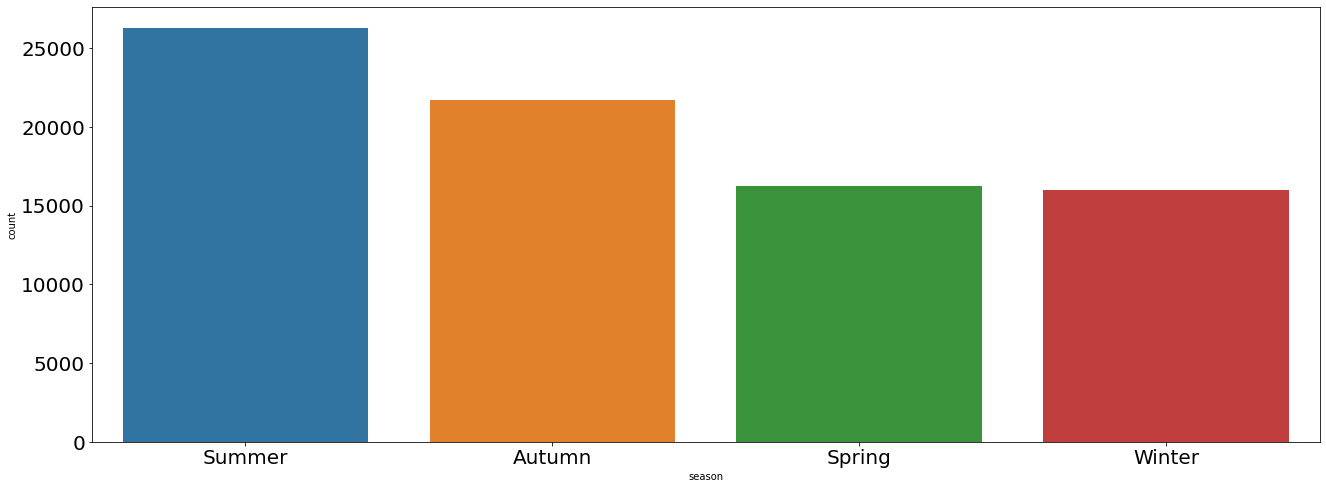

In [22]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="season", data=ufo_df, order=ufo_df['season'].value_counts().index)

## At what hour are ufos most frequent?

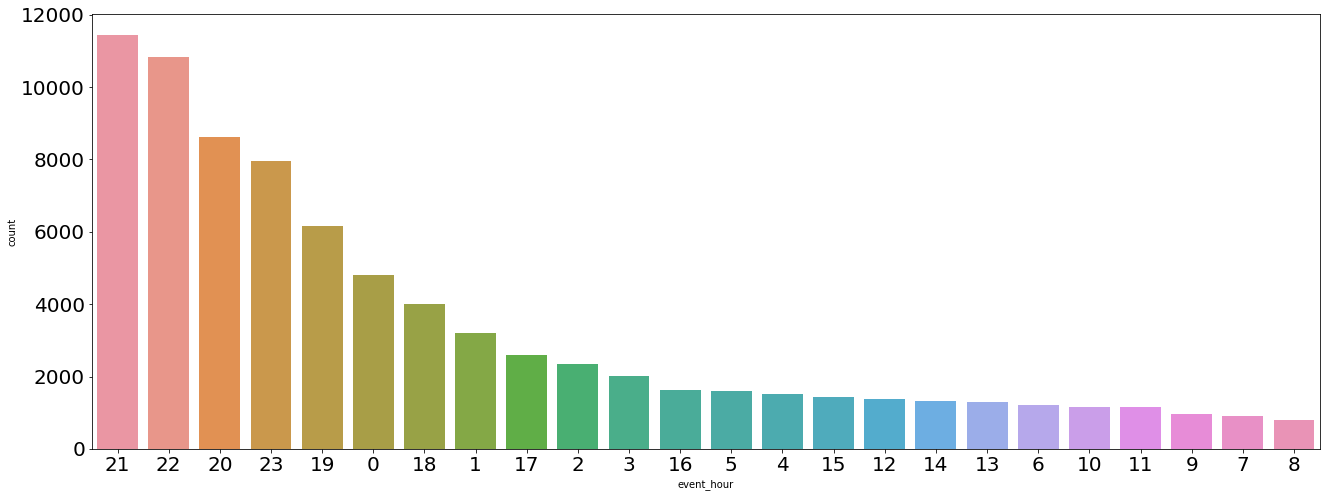

In [23]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="event_hour", data=ufo_df, order=ufo_df['event_hour'].value_counts().index)

## In which days of the week are ufos most frequent?

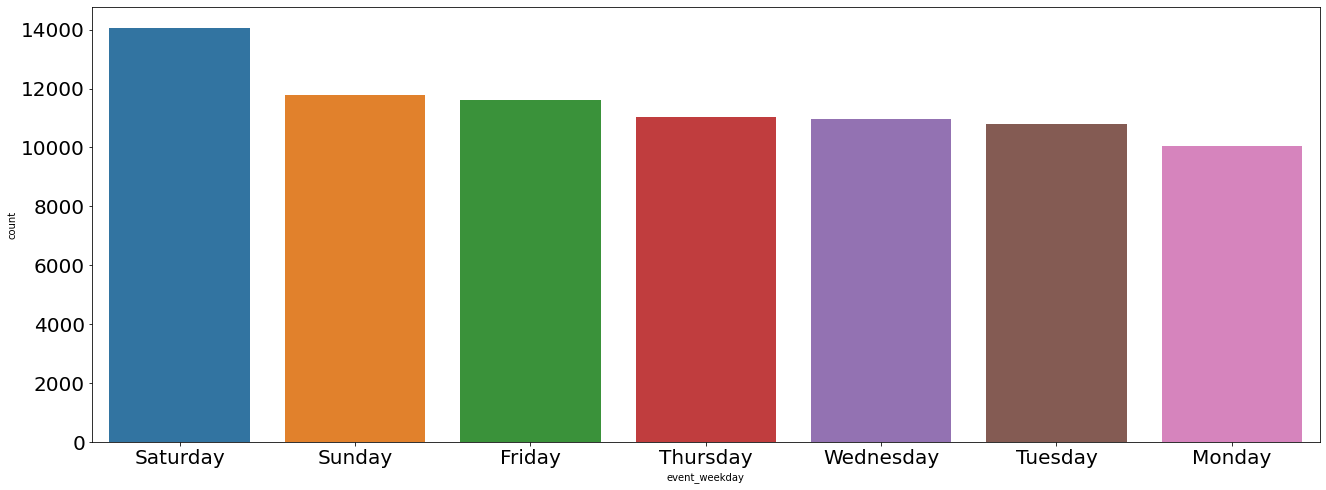

In [24]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="event_weekday", data=ufo_df, order=ufo_df['event_weekday'].value_counts().index)

## In what years of the week are ufos most frequent? (20 years span from 2012)

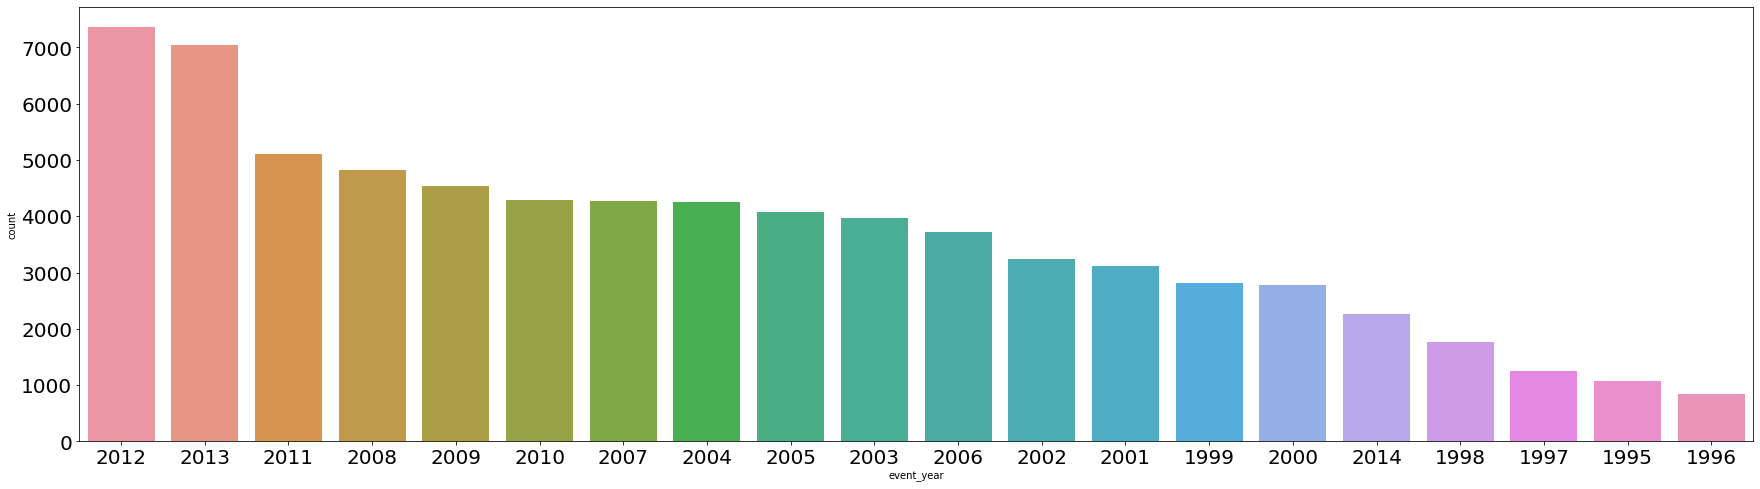

In [25]:
plt.subplots(figsize=(30,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="event_year", data=ufo_df, order=ufo_df['event_year'].value_counts().index[:20])

## In what countries are ufos most frequent?

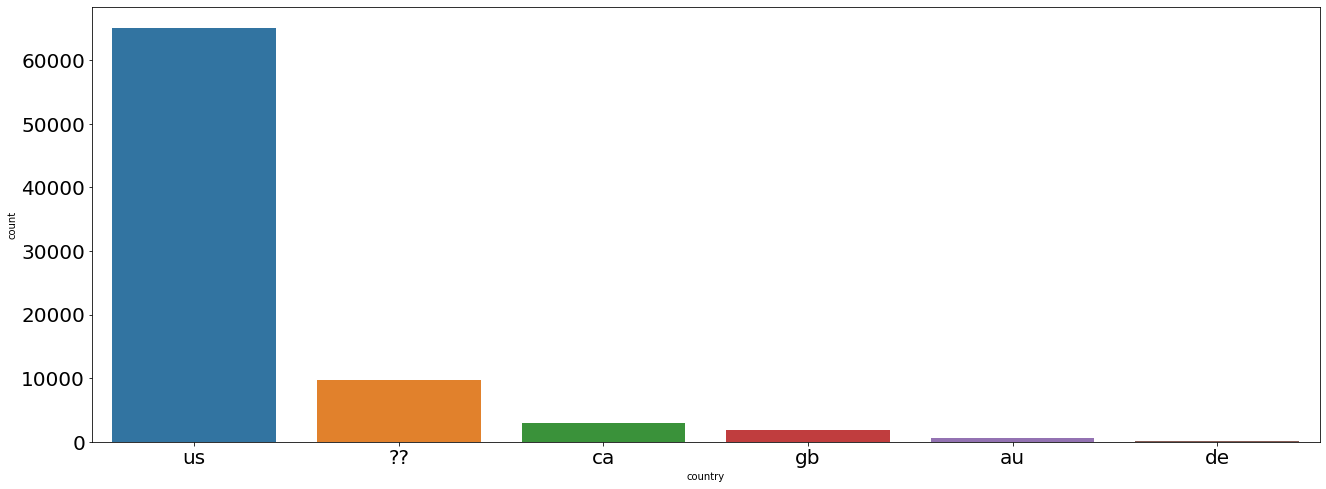

In [26]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="country", data=ufo_df, order=ufo_df['country'].value_counts().index)

## In what states are ufos frequent?

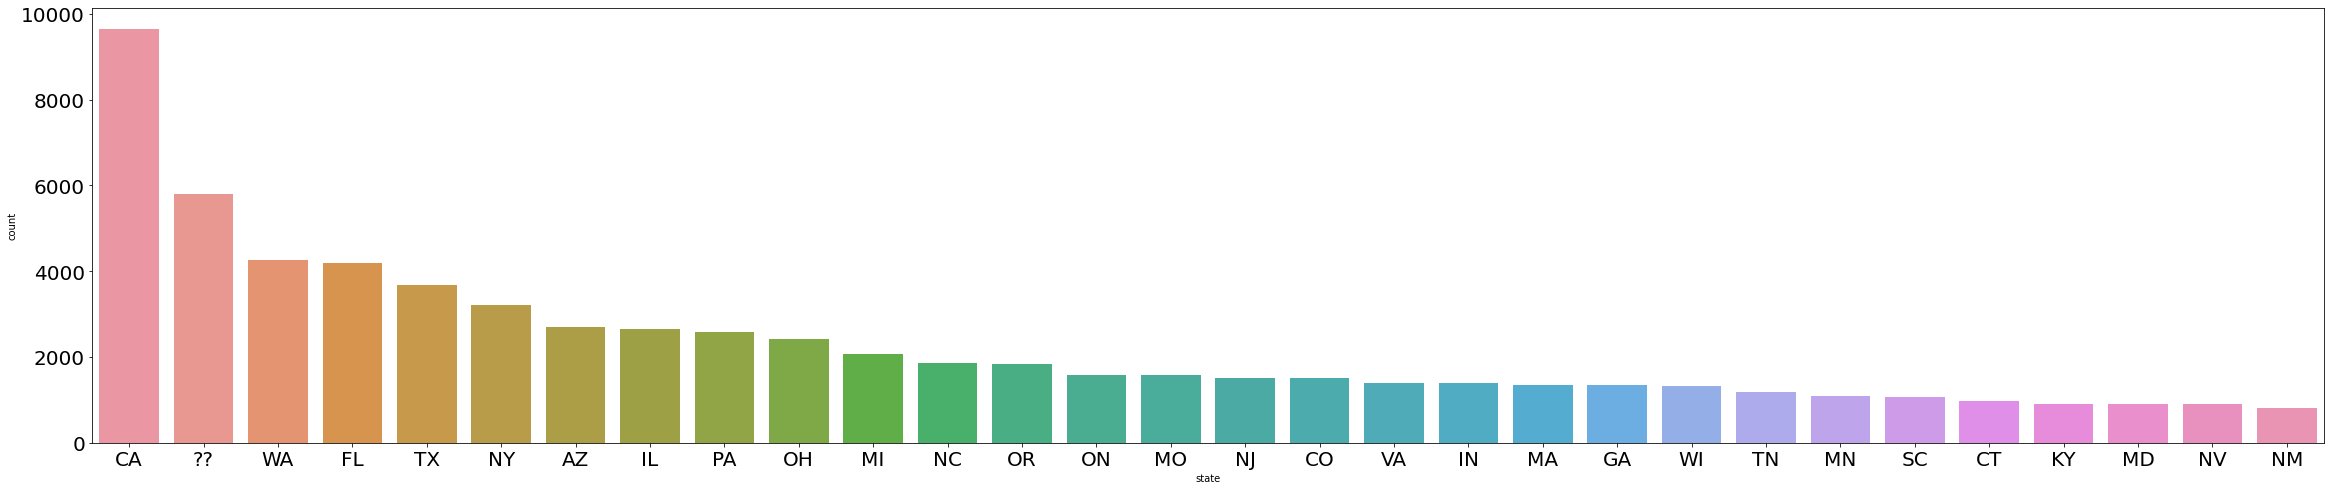

In [27]:
plt.subplots(figsize=(40,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="state", data=ufo_df, order=ufo_df['state'].value_counts().index[:30])

## What shapes do ufo have?

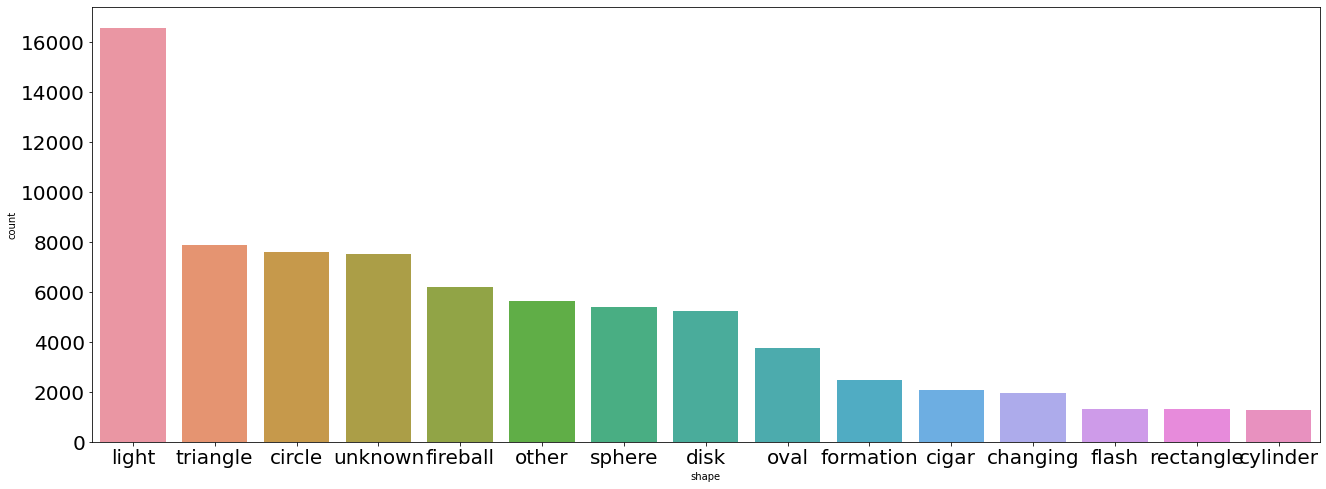

In [28]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="shape", data=ufo_df, order=ufo_df['shape'].value_counts().index[:15])

## What colors are the ufos?

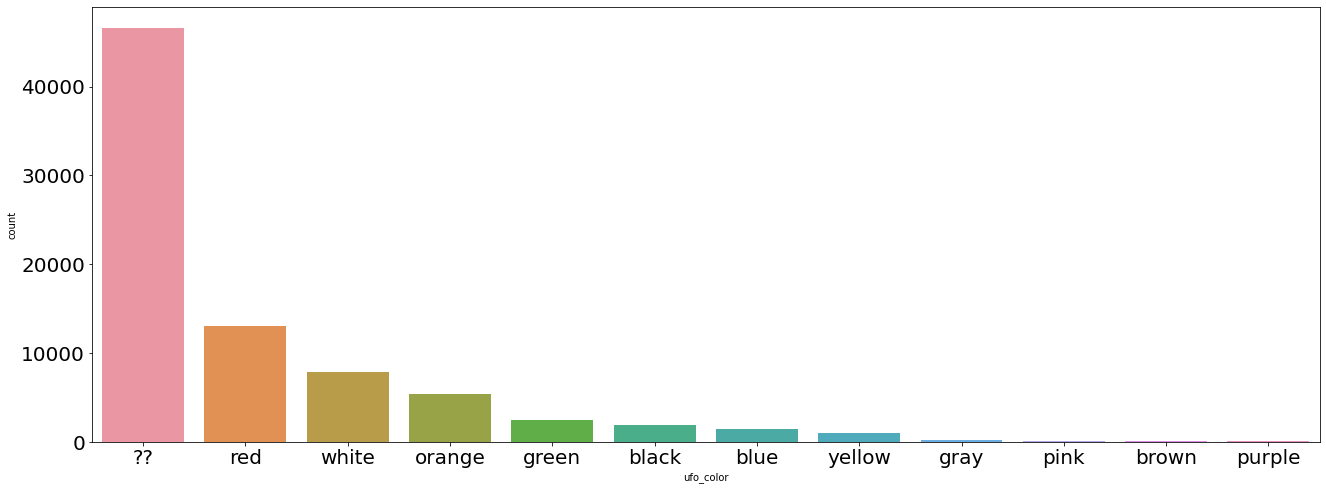

In [29]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="ufo_color", data=ufo_df, order=ufo_df['ufo_color'].value_counts().index[:15])

## How many seconds does an encounter last?

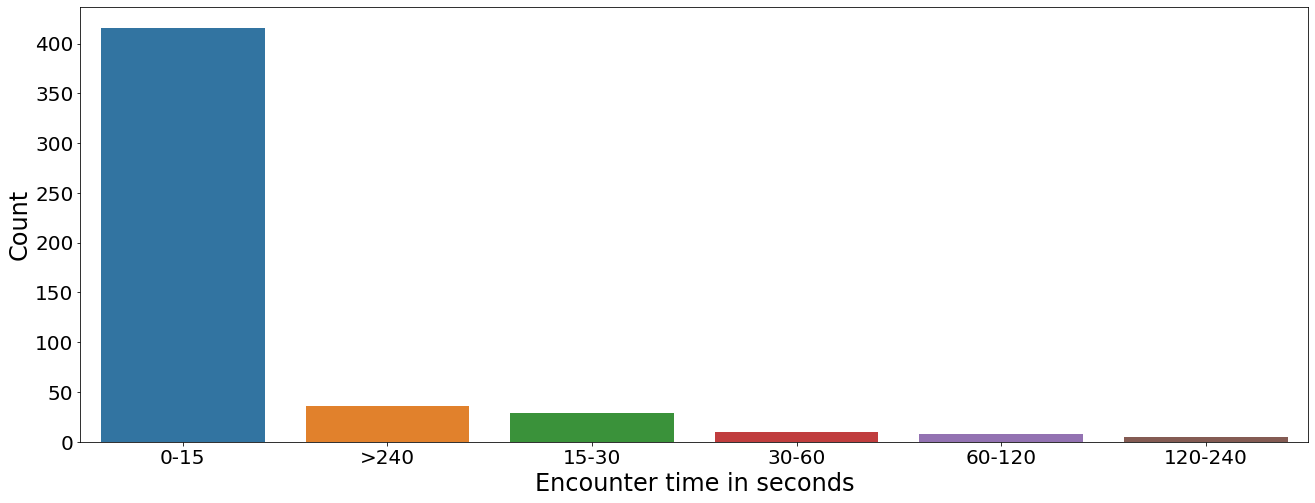

In [30]:
plt.subplots(figsize=(22,8))
duration_sec = [i for i in ufo_df["duration_seconds"].value_counts()]
duration_sec_list = []
for i in duration_sec:
    if i in range(0,16):
        duration_sec_list.append("0-15")
    if i in range(15,31):
        duration_sec_list.append("15-30")
    if i in range(31,61):
        duration_sec_list.append("30-60")
    if i in range(60,121):
        duration_sec_list.append("60-120")
    if i in range(120,241):
        duration_sec_list.append("120-240")
    if i > 240:
        duration_sec_list.append(">240")
        
duration_sec_list = pd.Series(duration_sec_list)
di = duration_sec_list.value_counts().index
dv = duration_sec_list.value_counts().values
sns.barplot(x=di,y=dv)

plt.xlabel("Encounter time in seconds",fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel("Count",fontsize=24)
plt.yticks(fontsize=20)

plt.show()

## Season VS Weekday

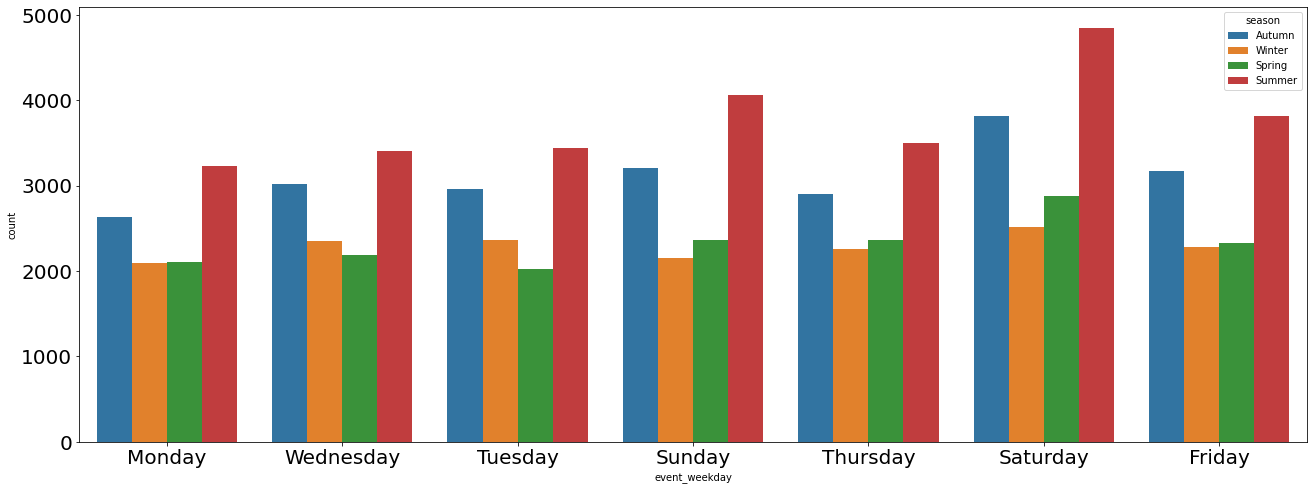

In [31]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="event_weekday", hue="season", data=ufo_df)

## Shape VS Season

<AxesSubplot:xlabel='season', ylabel='count'>

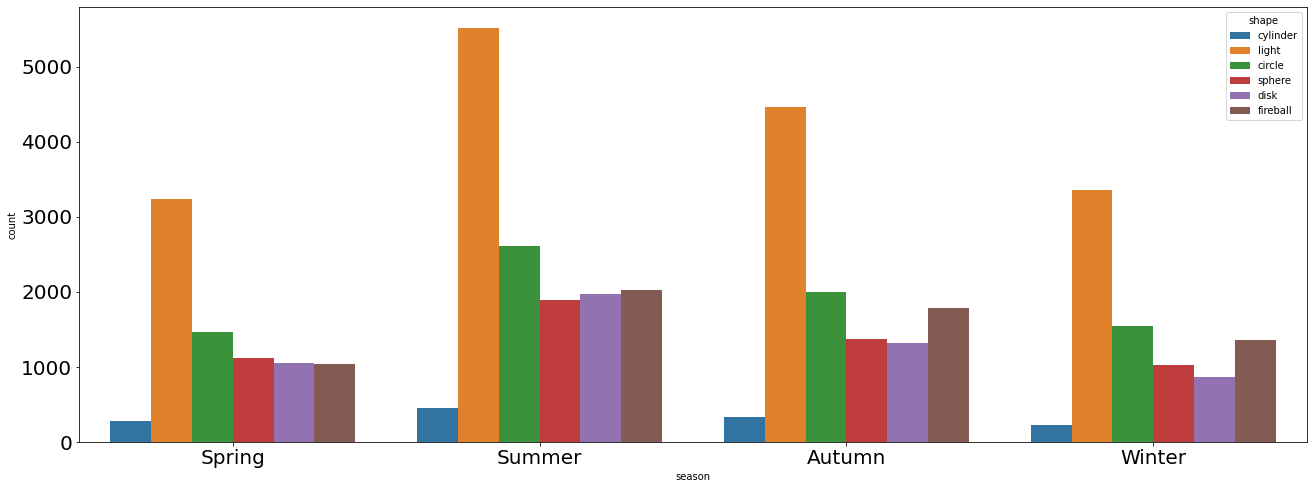

In [32]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.countplot(x="season", hue="shape", order=['Spring', 'Summer', 'Autumn', 'Winter'], hue_order=['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball'], data=ufo_df)

## Shape VS Color

<AxesSubplot:xlabel='ufo_color', ylabel='count'>

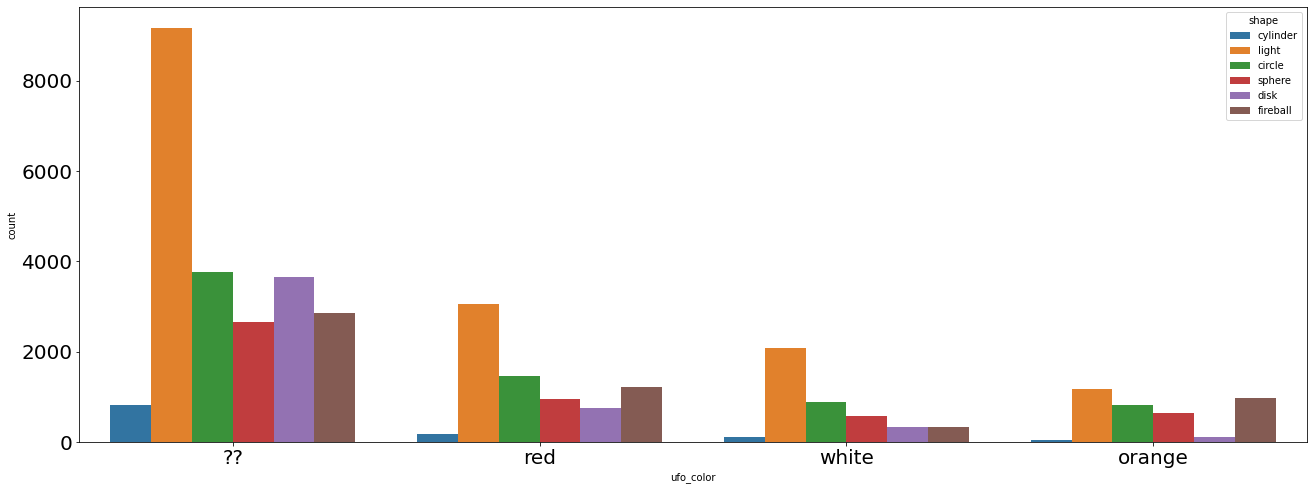

In [33]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.countplot(x="ufo_color", hue="shape", order=['??', 'red', 'white', 'orange'], hue_order=['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball'], data=ufo_df)

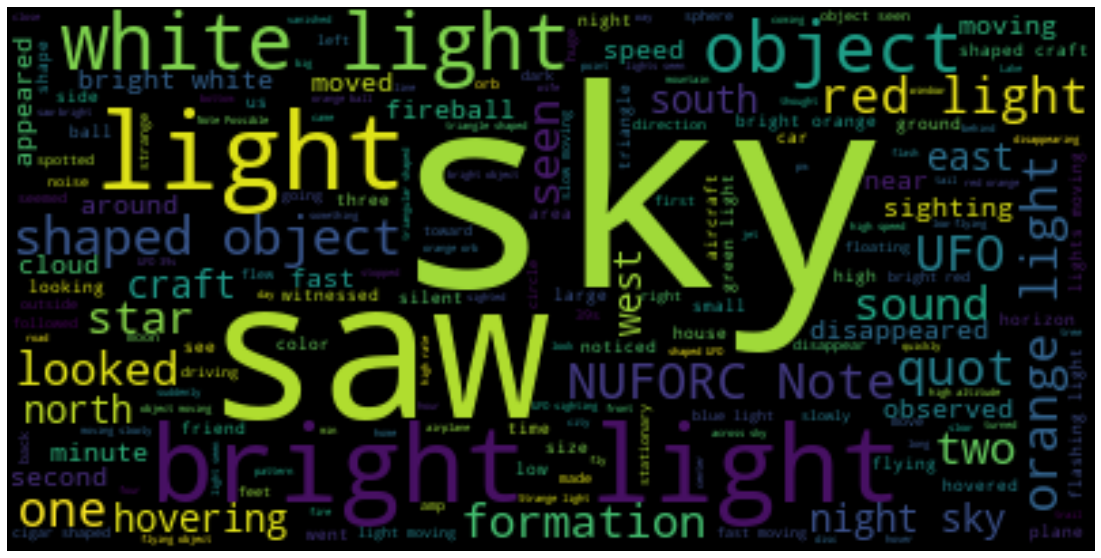

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().generate(' '.join(ufo_df['comments']))

plt.subplots(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
ufo_df.columns

Index(['datetime', 'year', 'city', 'state', 'country', 'shape',
       'duration_seconds', 'duration_hours', 'comments', 'date_posted',
       'latitude', 'longitude', 'datetime_dtformat', 'clean_comments',
       'season', 'ufo_color', 'event_year', 'event_weekday', 'event_hour'],
      dtype='object')

In [36]:
pickle.dump(ufo_df, open('./data/ufo_df.pickle', 'wb'))
%store ufo_df

Stored 'ufo_df' (DataFrame)


## Are aliens really trying to contact us? Is the government hiding something? Let's find out!

### Lets look into all military bases in the US

In [37]:
militarybase_data = pd.read_csv('data/military_bases.csv', sep = ';')
militarybase_data.head(2)

Geo Point  \
0  36.6032534708,-121.912105279   
1  18.4127920097,-66.1214794902   

                                           Geo Shape  OBJECTID_1  OBJECTID  \
0  {"type": "Polygon", "coordinates": [[[-121.896...          48       105   
1  {"type": "Polygon", "coordinates": [[[-66.1153...          88       637   

      COMPONENT             Site Name Joint Base   State Terr        COUNTRY  \
0   Army Active  Presidio of Monterey        NaN   California  United States   
1  Army Reserve         Fort Buchanan        NaN  Puerto Rico    Puerto Rico   

  Oper Stat  PERIMETER      AREA    Shape_Leng    Shape_Area  
0    Active   4.351336  0.610378   9080.019355  2.457794e+06  
1    Active   7.450958  1.151803  12589.594748  3.331642e+06

In [38]:
militarybase_data = militarybase_data.rename(columns={'Site Name': 'Site_Name'})
militarybase_data = militarybase_data.rename(columns={'Geo Point': 'Geo_Point'})
militarybase_data['Geo_Tuple'] = militarybase_data['Geo_Point'].apply(lambda x : tuple(map(float, x.split(','))))

In [39]:
militarybase_data['Geo Point List'] = militarybase_data['Geo_Point'].apply(lambda x : x.split(sep = ','))
militarybase_data['latitude'] = militarybase_data['Geo Point List'].apply(lambda x: x[0] )
militarybase_data['longtitude'] = militarybase_data['Geo Point List'].apply(lambda x: x[1] )

In [40]:
ufo_df = ufo_df.rename(columns={'longitude': 'longtitude'})
ufo_df['Geo_Tuple'] = ufo_df[ ['latitude', 'longtitude'] ].values.tolist()
ufo_df['Geo_Tuple'] = ufo_df['Geo_Tuple'].apply(lambda x : tuple(x))

### Lets only take ufo data from the states

In [41]:
us_states = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

# UFO sightings in United States only (70,805 rows)
ufo_df = ufo_df[ufo_df['state'].isin(us_states)].sort_values('year')
ufo_df = ufo_df[(ufo_df.latitude > 15) & (ufo_df.longtitude < -65)]
ufo_df = ufo_df[(ufo_df.latitude > 50) & (ufo_df.longtitude > -125) == False]
ufo_df = ufo_df[ufo_df['city'].str.contains('\(Canada\)|\(Mexico\)') == False]

In [42]:

fig = go.Figure()

trace_data_military = go.Scattergeo(
        lon = militarybase_data['longtitude'],
        lat = militarybase_data['latitude'],
        name = "Military Bases",
        text= militarybase_data['Site_Name'],
        mode = 'markers',
                                marker = dict(
                                            size = 13,
                                            opacity = 0.75,
                                            color = 'rgb(141, 99, 255)',
                                            line = dict(color = 'rgb(255, 255, 255)', width = 1)),
        )

trace_data_ufo = go.Scattergeo(
        lon = ufo_df['longtitude'],
        lat = ufo_df['latitude'],
        name = "UFO sightings",
        text= ufo_df['datetime'],
        mode = 'markers',
                                marker = dict(
                                            size = 3.5,
                                            opacity = 0.75,
                                            color = 'rgb(0, 163, 81)',
                                            line = dict(color = 'rgb(255, 255, 255)', width = 1)),
        )

fig.update_layout(
        title = 'Military Bases and UFO sightings',
        geo_scope='usa',
    )

data = [trace_data_military, trace_data_ufo]

# figure = dict(data = data, layout = layout)
# iplot(figure)

In [43]:

fig = go.Figure()

trace_data_military = go.Scattergeo(
        lon = militarybase_data['longtitude'],
        lat = militarybase_data['latitude'],
        name = "Military Bases",
        text= militarybase_data['Site_Name'],
        mode = 'markers',
                                marker = dict(
                                            size = 13,
                                            opacity = 0.75,
                                            color = 'rgb(141, 99, 255)',
                                            line = dict(color = 'rgb(255, 255, 255)', width = 1)),
        )

trace_data_ufo = go.Scattergeo(
        lon = ufo_df['longtitude'],
        lat = ufo_df['latitude'],
        name = "UFO sightings",
        text= ufo_df['datetime'],
        mode = 'markers',
                                marker = dict(
                                            size = 3.5,
                                            opacity = 0.75,
                                            color = 'rgb(0, 163, 81)',
                                            line = dict(color = 'rgb(255, 255, 255)', width = 1)),
        )

fig.update_layout(
        title = 'Military Bases and UFO sightings',
        geo_scope='usa',
    )

data = [trace_data_military, trace_data_ufo]

# figure = dict(data = data, layout = layout)
# iplot(figure)

# If there are many real alien UFO sightings, they should have no correlation with the distance to the nearest military base!

### Compute distance from each sighting to nearest base

In [44]:
# Function: distance between two coordinates

import math

def distance_geo_coo(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    distance_km = 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return distance_km

In [45]:
# Example of finding closest point between two locations on the planed loc1(lat1,lon1), loc2(lat2,lon2)

R = 6373.0

lat1 = 52.2296756
lon1 = 21.0122287

lat2 = 52.406374
lon2 = 16.9251681

c1 = lat1,lon1
c2 = lat2, lon2

distance_geo_coo(c1, c2)

278.54558935106706

In [46]:
# Create dictionary with the name of the base and the geolocation in lat and long

military_location_dict = dict(zip(militarybase_data.Site_Name, militarybase_data.Geo_Tuple) )
                              
military_location_dict                         

print(military_location_dict['Presidio of Monterey'] )

(36.6032534708, -121.912105279)


In [47]:
# Function that takes a location( coord1 , coord2 ), and the millitary 
# base dictionar and scans for the closest base in the dict

def closest_base(location, location_dict,mod):
    closest_location = None
    for city in location_dict.keys():
        distance = distance_geo_coo(location, location_dict[city])
        if closest_location is None:
            closest_location = (city, distance)
        elif distance < closest_location[1]:
            closest_location = (city, distance)
    name_site, distance = closest_location
    if mod == 'name':
        return name_site
    if mod == 'distance':
        return distance

### Lets test some examples according to the map!

In [48]:
# Example of finding closest point inside base dictionary

# look up military base coordinates closeby: Boise Air Terminal
# https://goo.gl/maps/io1ctS84BrkCxJjn6

test = (44.053597812599115, -116.12254832876721) # Should be Boise Air Terminal'


test = (35, -116.26700072568501) # should be NAWS china lake
test = (47,-99)                  # Should be NG Camp Grafton

name_site = closest_base(test, military_location_dict, 'name')
print(name_site)

distance = closest_base(test, military_location_dict, 'distance')
print(distance)

NG Camp Grafton
88.40339696546964


### Lets make two columns with nearest military base and distance

In [50]:
# Use function above to compute nearest base name for each UFO sighting

ufo_df['military_base_name'] = ufo_df['Geo_Tuple'].apply(lambda x : closest_base(x, military_location_dict, 'name'))

ufo_df['military_base_dist'] = ufo_df['Geo_Tuple'].apply(lambda x : closest_base(x, military_location_dict, 'distance'))

### UFO's or military objects?

#### Distribution is skewed towards lesser distance to closest military base; are we onto something?!

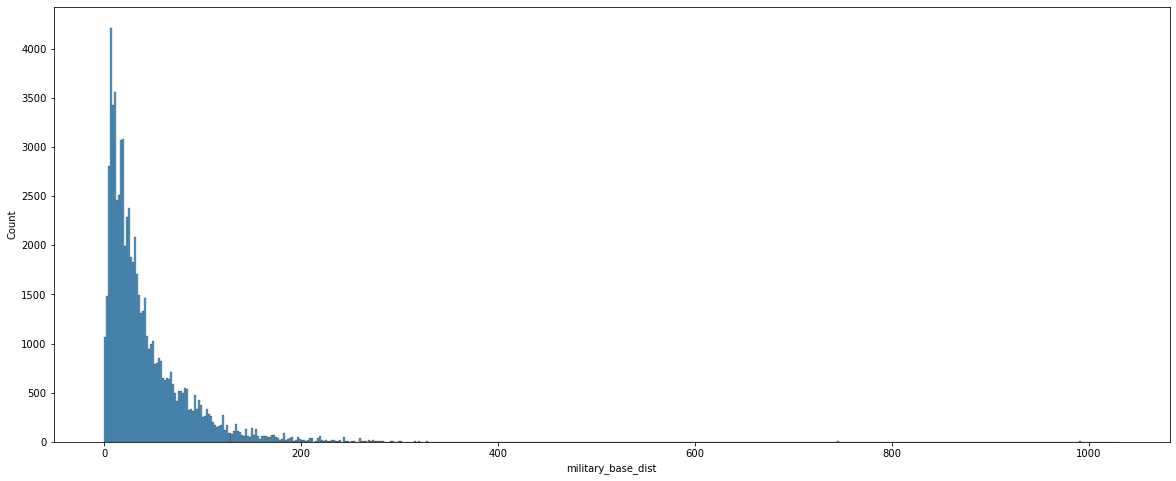

In [51]:
from matplotlib import pyplot
import seaborn

plt.subplots(figsize=(20,8))
ax = seaborn.histplot(ufo_df['military_base_dist'])

# Predict based on object

In [52]:
# machine learning
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection  import *
from sklearn.linear_model  import *

In [53]:
# machine learning
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection  import *
from sklearn.linear_model  import *

### Preprocessing

In [54]:
ufo_df.columns

Index(['datetime', 'year', 'city', 'state', 'country', 'shape',
       'duration_seconds', 'duration_hours', 'comments', 'date_posted',
       'latitude', 'longtitude', 'datetime_dtformat', 'clean_comments',
       'season', 'ufo_color', 'event_year', 'event_weekday', 'event_hour',
       'Geo_Tuple', 'military_base_name', 'military_base_dist'],
      dtype='object')

In [55]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

ufo_df_num = ufo_df.select_dtypes(include=numerics)

ufo_df_num.head(3)

year  duration_seconds   latitude  longtitude  event_year  event_hour  \
14868     0               600  38.453120  -85.670241        2004           0   
43727     0                60  39.569722  -75.048056        2008           0   
35114     0                 2  27.143889  -80.200833        1998           0   

       military_base_dist  
14868            5.596096  
43727           37.523653  
35114           20.218901

In [56]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

ufo_df_num = ufo_df.select_dtypes(include=numerics)

ufo_df_num.head(3)

year  duration_seconds   latitude  longtitude  event_year  event_hour  \
14868     0               600  38.453120  -85.670241        2004           0   
43727     0                60  39.569722  -75.048056        2008           0   
35114     0                 2  27.143889  -80.200833        1998           0   

       military_base_dist  
14868            5.596096  
43727           37.523653  
35114           20.218901

In [57]:
column_names = ufo_df_num.columns
column_names

Index(['year', 'duration_seconds', 'latitude', 'longtitude', 'event_year',
       'event_hour', 'military_base_dist'],
      dtype='object')

In [58]:
ufo_df.columns

Index(['datetime', 'year', 'city', 'state', 'country', 'shape',
       'duration_seconds', 'duration_hours', 'comments', 'date_posted',
       'latitude', 'longtitude', 'datetime_dtformat', 'clean_comments',
       'season', 'ufo_color', 'event_year', 'event_weekday', 'event_hour',
       'Geo_Tuple', 'military_base_name', 'military_base_dist'],
      dtype='object')

### Train and test split

In [59]:
!mkdir data
!mkdir ./data/split

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘./data/split’: File exists


In [60]:
%%writefile ./data/split/config.yaml

Description: Split in train and test for the UFO data

Overwriting ./data/split/config.yaml


In [68]:
import re
import pickle
from sklearn.model_selection import train_test_split

features = ['year', 'duration_seconds', 'event_year', 'event_hour']

#features = ['datetime', 'year', 'city', 'state', 'country', 'shape',
#        'duration_seconds', 'duration_hours', 'comments', 'date_posted',
#        'latitude', 'longtitude', 'datetime_dtformat', 'clean_comments',
#        'season', 'ufo_color', 'event_year', 'event_weekday', 'event_hour',
#        'Geo_Tuple', 'military_base_name']

target = ['military_base_dist']

X_train, X_test, y_train, y_test = train_test_split(ufo_df_num[features], \
                                                    ufo_df_num[target], \
                                                    test_size=0.2, \
                                                    random_state=2010)

pickle.dump(train_test_split(ufo_df_num[features], \
                                ufo_df_num[target], \
                                test_size=0.2, \
                                random_state=2020), open('./data/split/split.pickle', 'wb'))

### Predict distance to military base

In [62]:
import pickle
from sklearn import linear_model
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

from sklearn.preprocessing import *
from sklearn.decomposition import*
from sklearn.neighbors import*

In [70]:
X_train, X_test, y_train, y_test = pickle.load(open('./data/split/split.pickle', 'rb'))

y_test

military_base_dist
76586           26.388439
79366            6.507806
8344            26.241153
21028           62.602904
8667            37.854836
...                   ...
65734            3.354666
25932           26.344032
19753           91.749733
43401           41.652916
4203            10.153346

[14162 rows x 1 columns]

http://epistasislab.github.io/tpot/installing/

In [64]:
from tpot import TPOTClassifier

In [96]:
y_train_series = y_train.iloc[:,0]

y_train_series.shape

X_train.shape

(56644, 4)

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42, max_time_mins = )
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

/home/berend/anaconda3/envs/python_for_DS/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/berend/anaconda3/envs/python_for_DS/lib/python3.8/site-packages/tpot/tpot.py:64: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/berend/anaconda3/envs/python_for_DS/lib/python3.8/site-packages/pandas/core/frame.py:3491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/berend/anaconda3/envs/python_

# Predict distance to military base (if tpot outputs)

In [ ]:

from sklearn import linear_model
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

from sklearn.preprocessing import *
from sklearn.decomposition import*
from sklearn.neighbors import*

In [ ]:
X_train, X_test, y_train, y_test = pickle.load(open('./data/split/split.pickle', 'rb'))

In [ ]:
class CustomTransformer(TransformerMixin):
    def __init__(self, classifier = sklearn.neighbors.KNeighborsClassifier(5)):
        self.classifier = classifier
        self.pipeline = Pipeline([('scaler', StandardScaler()), \
                                  ('regression', LinearRegression())])
    def fit(self, X, y=None):
        self.pipeline = self.pipeline.fit(X,y)
        return self.pipeline

    def predict(self, X):
        return self.pipeline.predict(X)

In [ ]:
classifier = CustomTransformer()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred = pd.DataFrame ( y_pred )


In [ ]:
print( metrics.max_error(y_test, y_pred) )
print( metrics.mean_absolute_error(y_test, y_pred))
print( metrics.mean_squared_error(y_test, y_pred) )
print( metrics.mean_squared_log_error(y_test, y_pred))
print( metrics.median_absolute_error(y_test, y_pred))
print( metrics.r2_score(y_test, y_pred))
print( metrics.mean_poisson_deviance(y_test, y_pred))
print( metrics.mean_gamma_deviance(y_test, y_pred))
print( metrics.mean_tweedie_deviance(y_test, y_pred))

In [ ]:
from matplotlib import pyplot
import seaborn

plt.subplots(figsize=(20,8))
ax = seaborn.histplot(y_test)